In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

# Unfolding for detector (up to dressed lepton level) 

In [3]:
binDef = "_FineCoarse"
channel = "electron"
year = "2016"
doSys = True

# Redirect STDOUT and STDERR
sys.stderr = open("stderr_"+channel+".txt", "w")
sys.stdout = open("stdout_"+channel+".txt", "w")

detUnfold_muon_2016 = an.ISRAnalysis(year, channel, True, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

# One step unfolding from detector to pre-FSR level
Unfold_muon_2016_oneStep = an.ISRAnalysis(year, channel, False, "matrix", 
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

In [4]:
detUnfold_muon_2016.checkMatrixCond()
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0xb92e178>

In [5]:
detUnfold_muon_2016.drawResponseM("Pt")

In [6]:
detUnfold_muon_2016.drawResponseM("Mass")

In [7]:
Unfold_muon_2016_oneStep.checkMatrixCond()
Unfold_muon_2016_oneStep.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0xbaef4e8>

In [8]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [9]:
# Nominal
Unfold_muon_2016_oneStep.setInputHist(False, False, None, "Detector")
Unfold_muon_2016_oneStep.setUnfoldBkgs(False, "Detector")
Unfold_muon_2016_oneStep.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [10]:
if doSys == True:
    if channel == "muon" :
        systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
                       #"L1Prefie":["L1PrefireUp","L1PrefireDown"], 
                       "PU":["PUUp", "PUDown"],
                       "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], 
                       "AlphaS":["AlphaSUp", "AlphaSDown"],
                       "Unfold_det": ["ZpTCorrected", "Nominal"]} # use different matrix file
                       #"LepMom": ["NoLepMomCorr", "Nominal"]} # use different matrix file
    
    if channel == "electron" :
        systematics = {"ID":["IdSFUp", "IdSFDown"],
                       "Reco":["recoSFUp","recoSFDown"], 
                       "TRG":["trgSFUp", "trgSFDown"], 
                       #"L1Prefie":["L1PrefireUp","L1PrefireDown"], 
                       "PU":["PUUp", "PUDown"],
                       "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], 
                       "AlphaS":["AlphaSUp", "AlphaSDown"]}
                       #"LepMom": ["NoLepMomCorr", "Nominal"]}
    
    for sysName, postfixs in systematics.items():
        for postfix in postfixs:
            detUnfold_muon_2016.setSystematics(sysName, postfix)
            Unfold_muon_2016_oneStep.setSystematics(sysName, postfix)
    
    for sysName, postfixs in systematics.items():
        for postfix in postfixs:
            #print(sysName + " " + postfix)
            detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
            detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)
            
            Unfold_muon_2016_oneStep.setInputHist(False, False, None, "Detector", True, sysName, postfix)
            Unfold_muon_2016_oneStep.setUnfoldBkgs(True, "Detector", sysName, postfix)
    
            detUnfold_muon_2016.subFake(True, sysName,postfix)
            Unfold_muon_2016_oneStep.subFake(True, sysName,postfix)

In [11]:
detUnfold_muon_2016.doUnfold(False)
if doSys:
    detUnfold_muon_2016.doUnfold(doSys, False)
    
Unfold_muon_2016_oneStep.doUnfold()
if doSys: 
    Unfold_muon_2016_oneStep.doUnfold(doSys)

In [12]:
for massBin in range(5):
    detUnfold_muon_2016.drawCorrelation("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, str(massBin))
    
detUnfold_muon_2016.drawCorrelation("Pt", "pt[UO];mass[UO]", True, "")
detUnfold_muon_2016.drawCorrelation("Mass", "mass[UO];pt[UOC]", True, "")

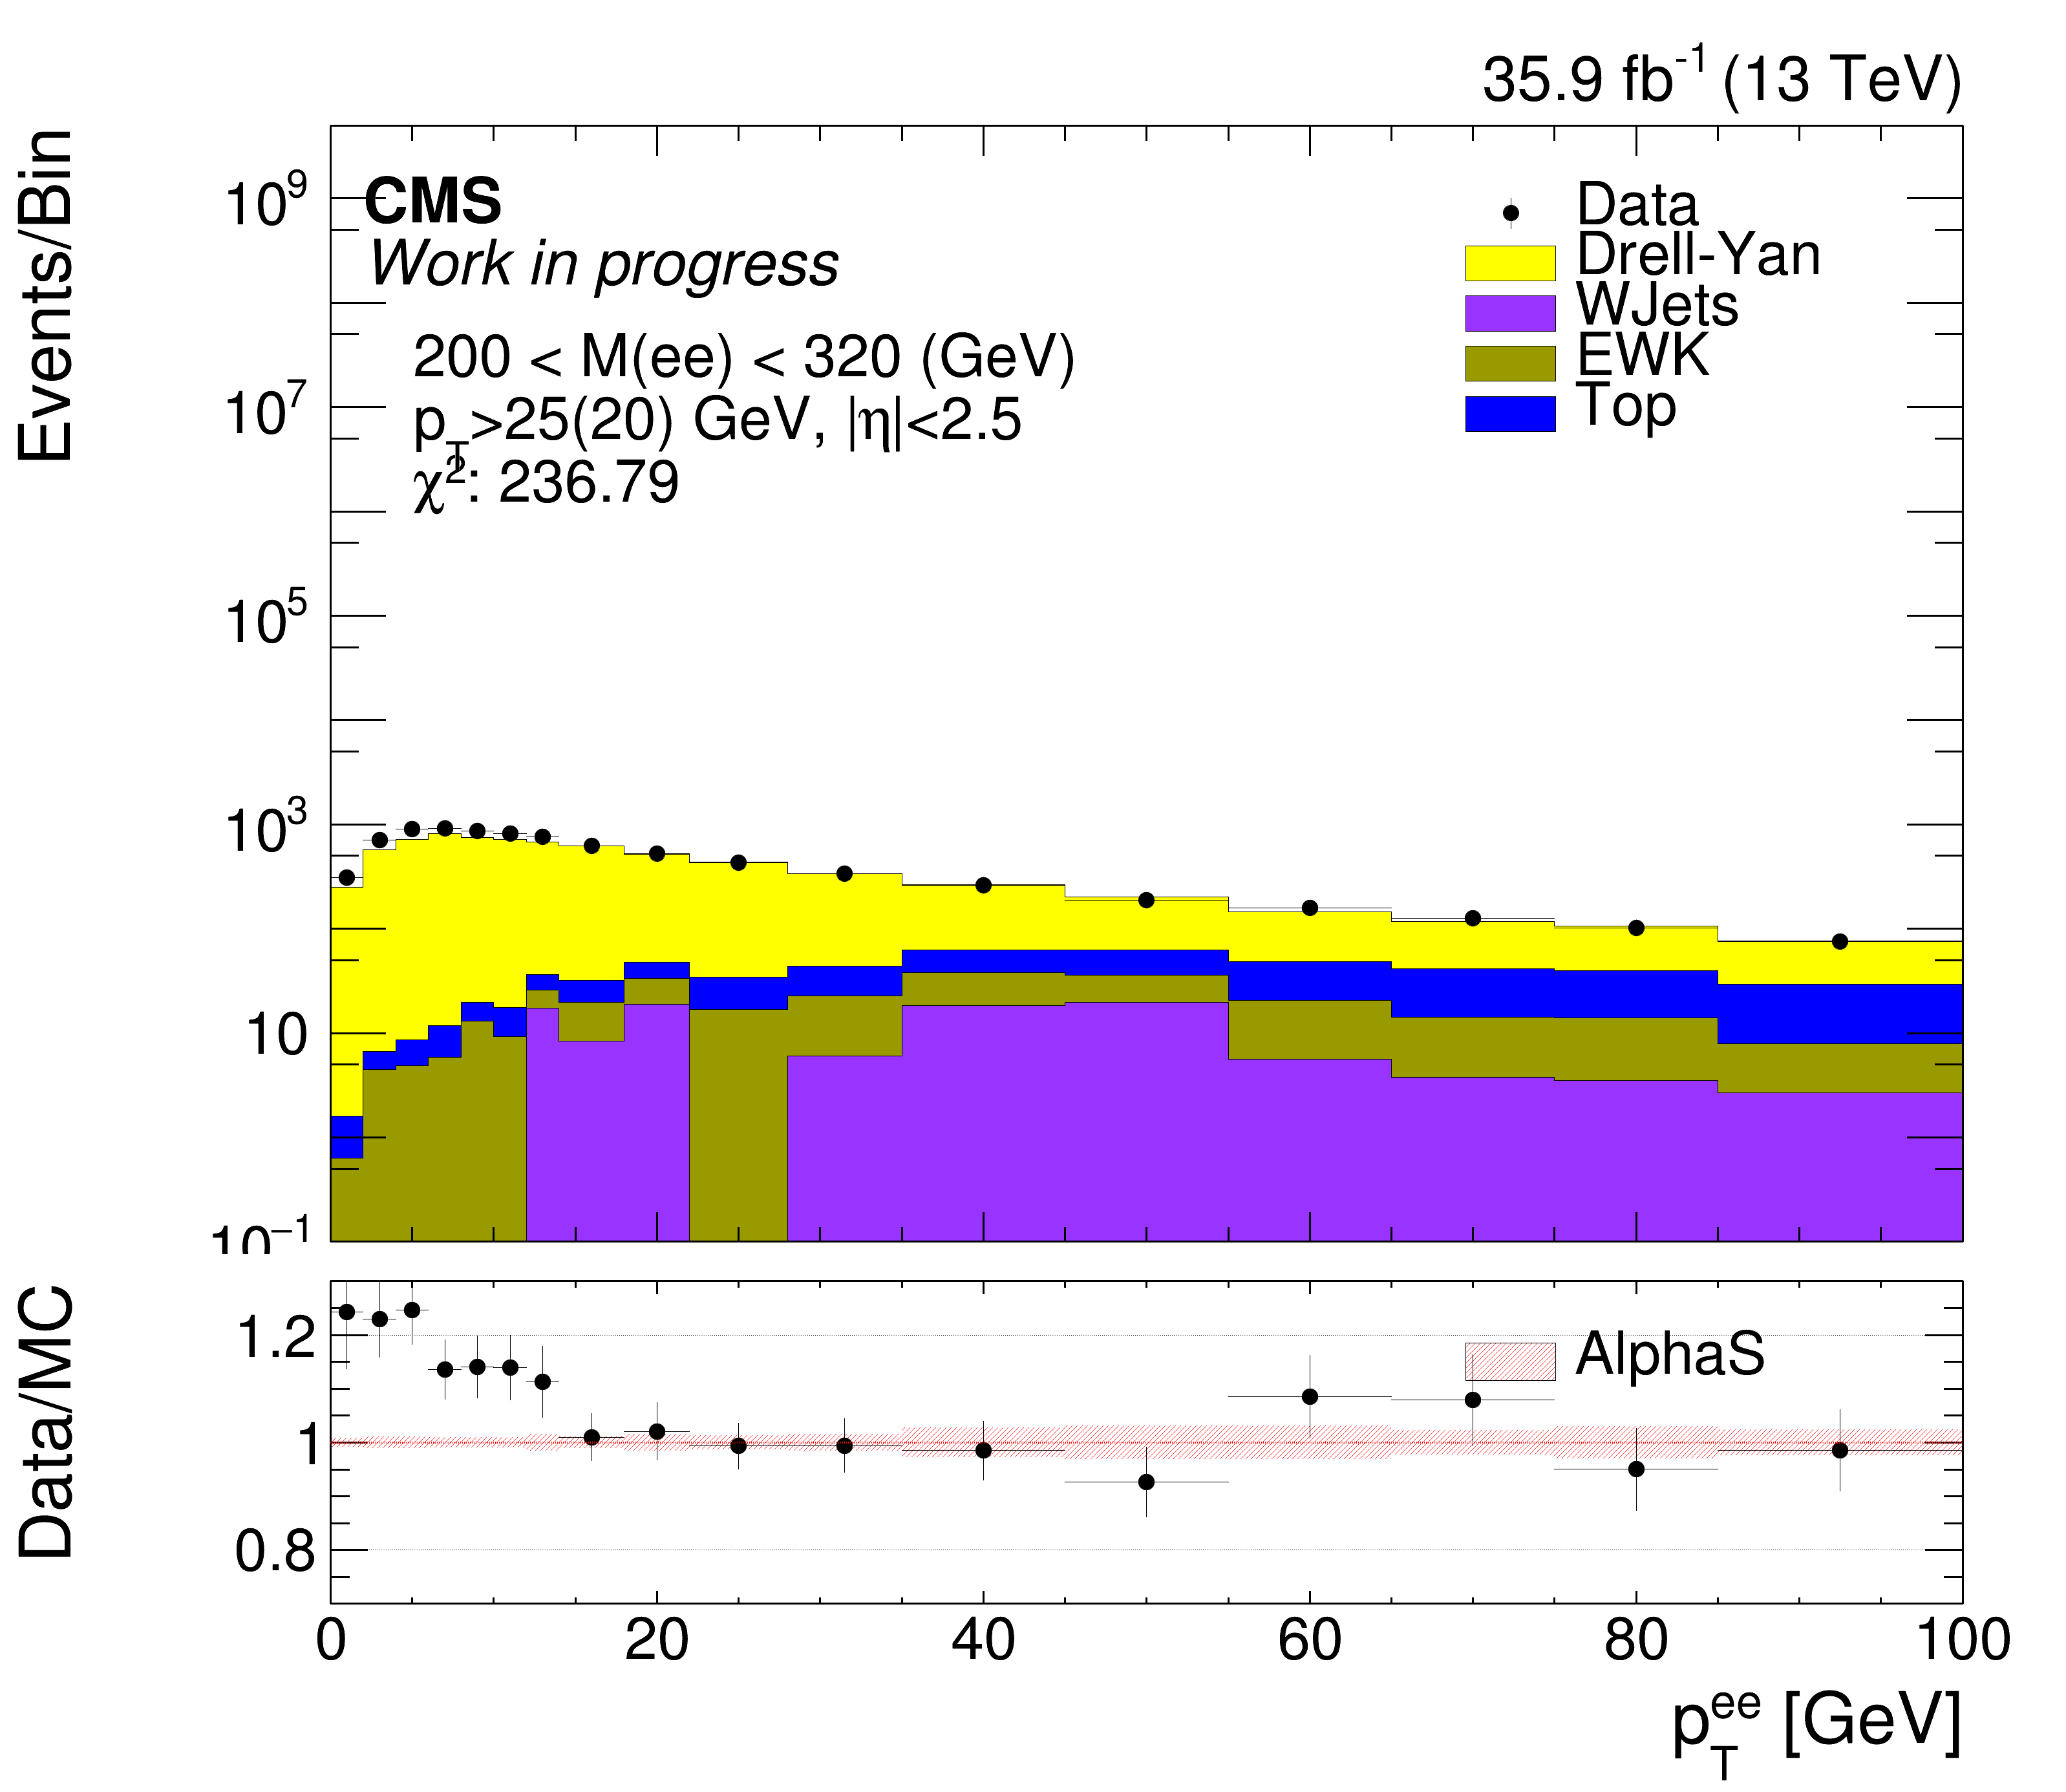

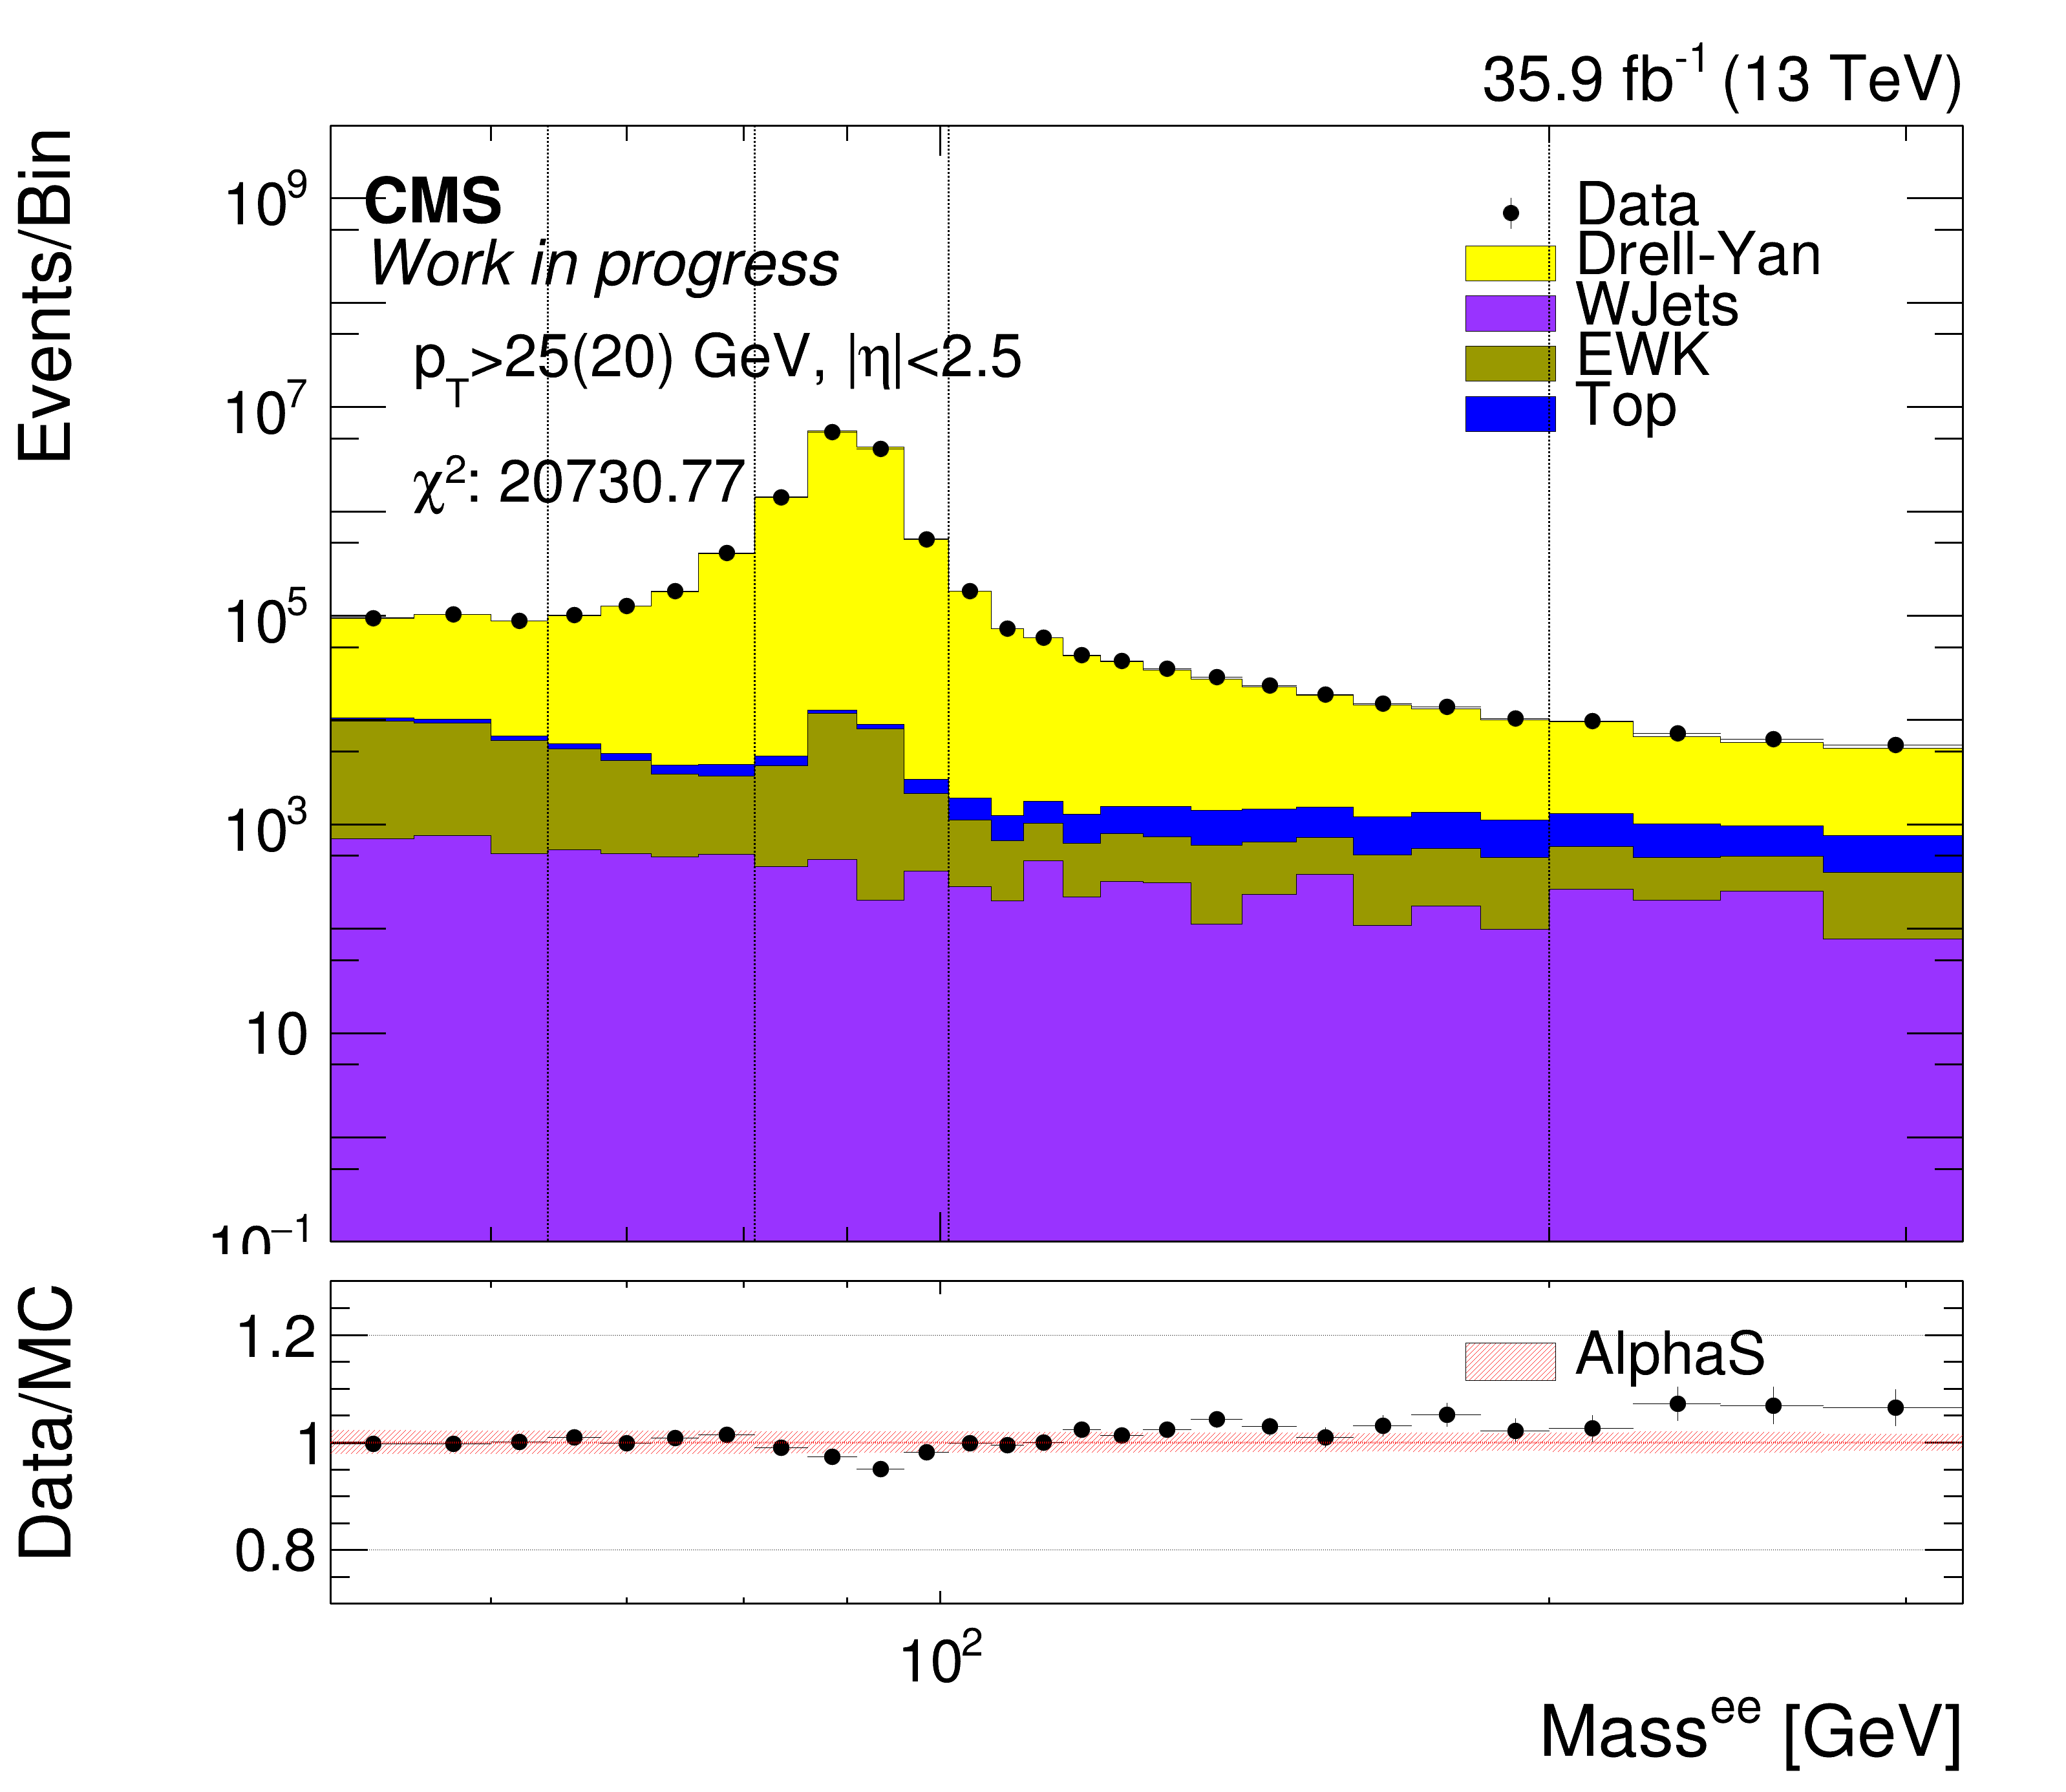

In [13]:
for massBin in range(5):
    detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DiPt_M"+str(massBin), massBin, True)
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

if doSys: 
    for sysName, _ in systematics.items():
        for massBin in range(5):
            detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DiPt_M"+str(massBin), massBin, True)
        detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, sysName)

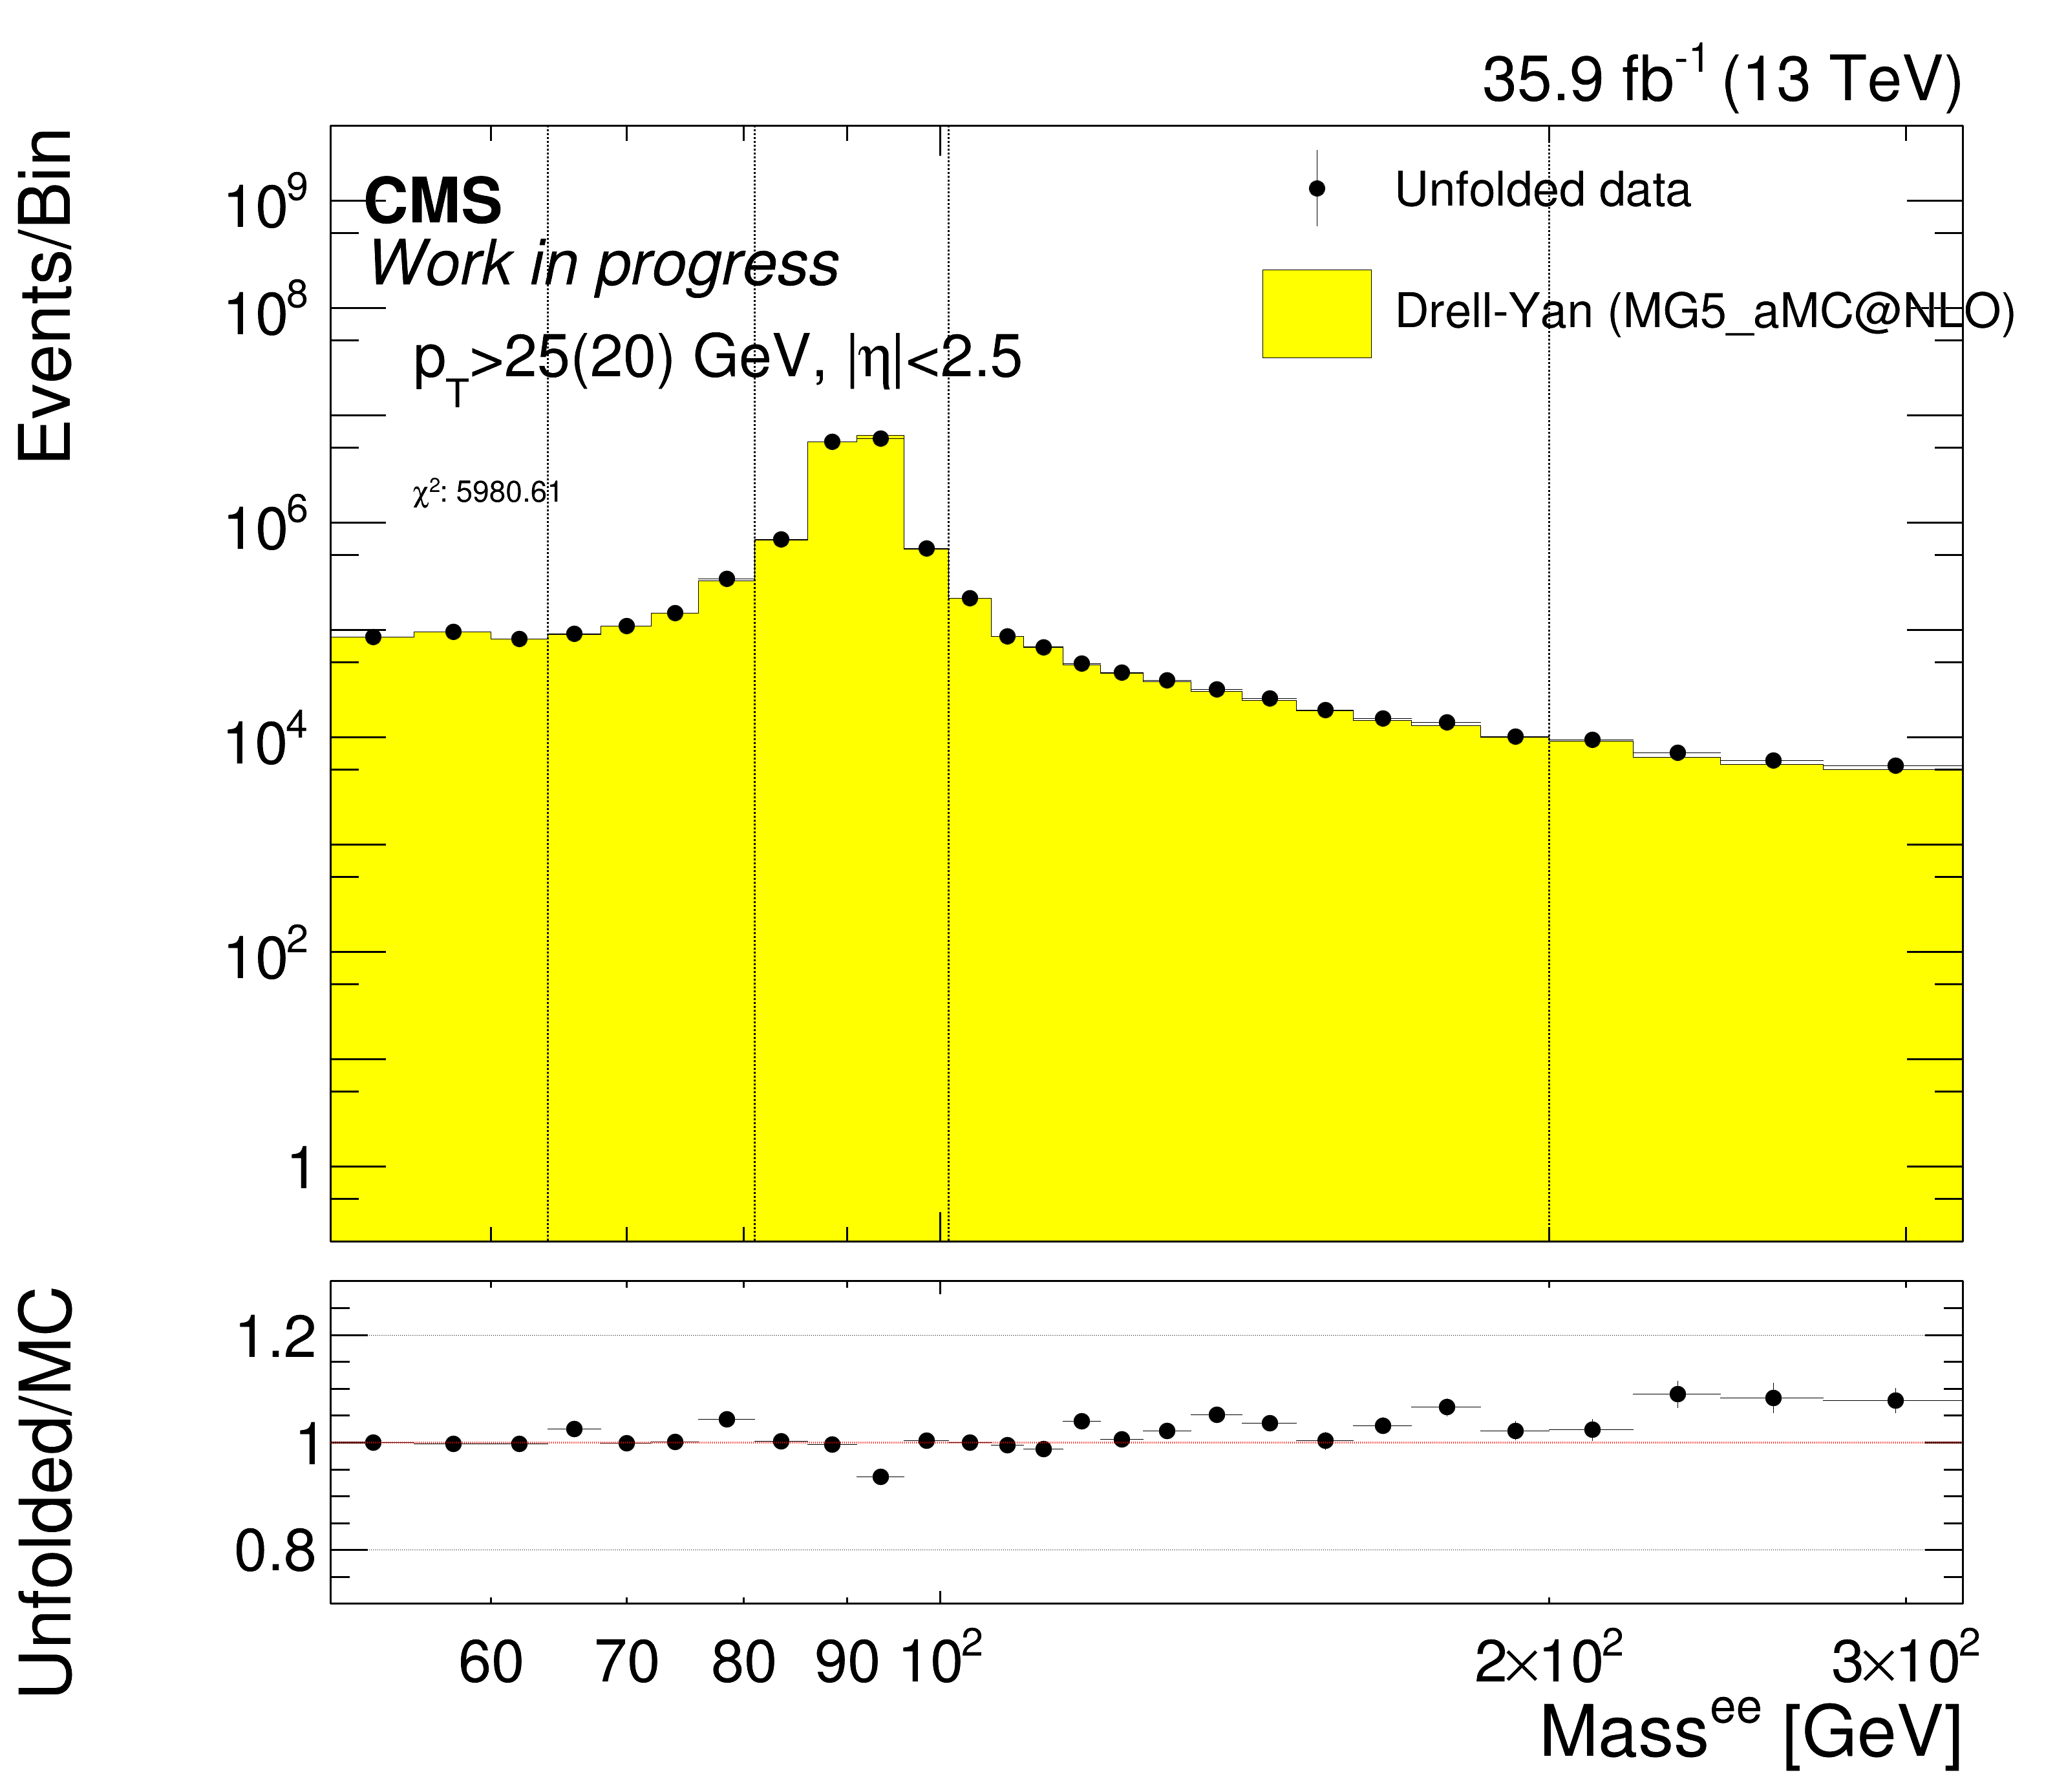

In [14]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

In [15]:
#detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "AcceptanceCorr_Mass")

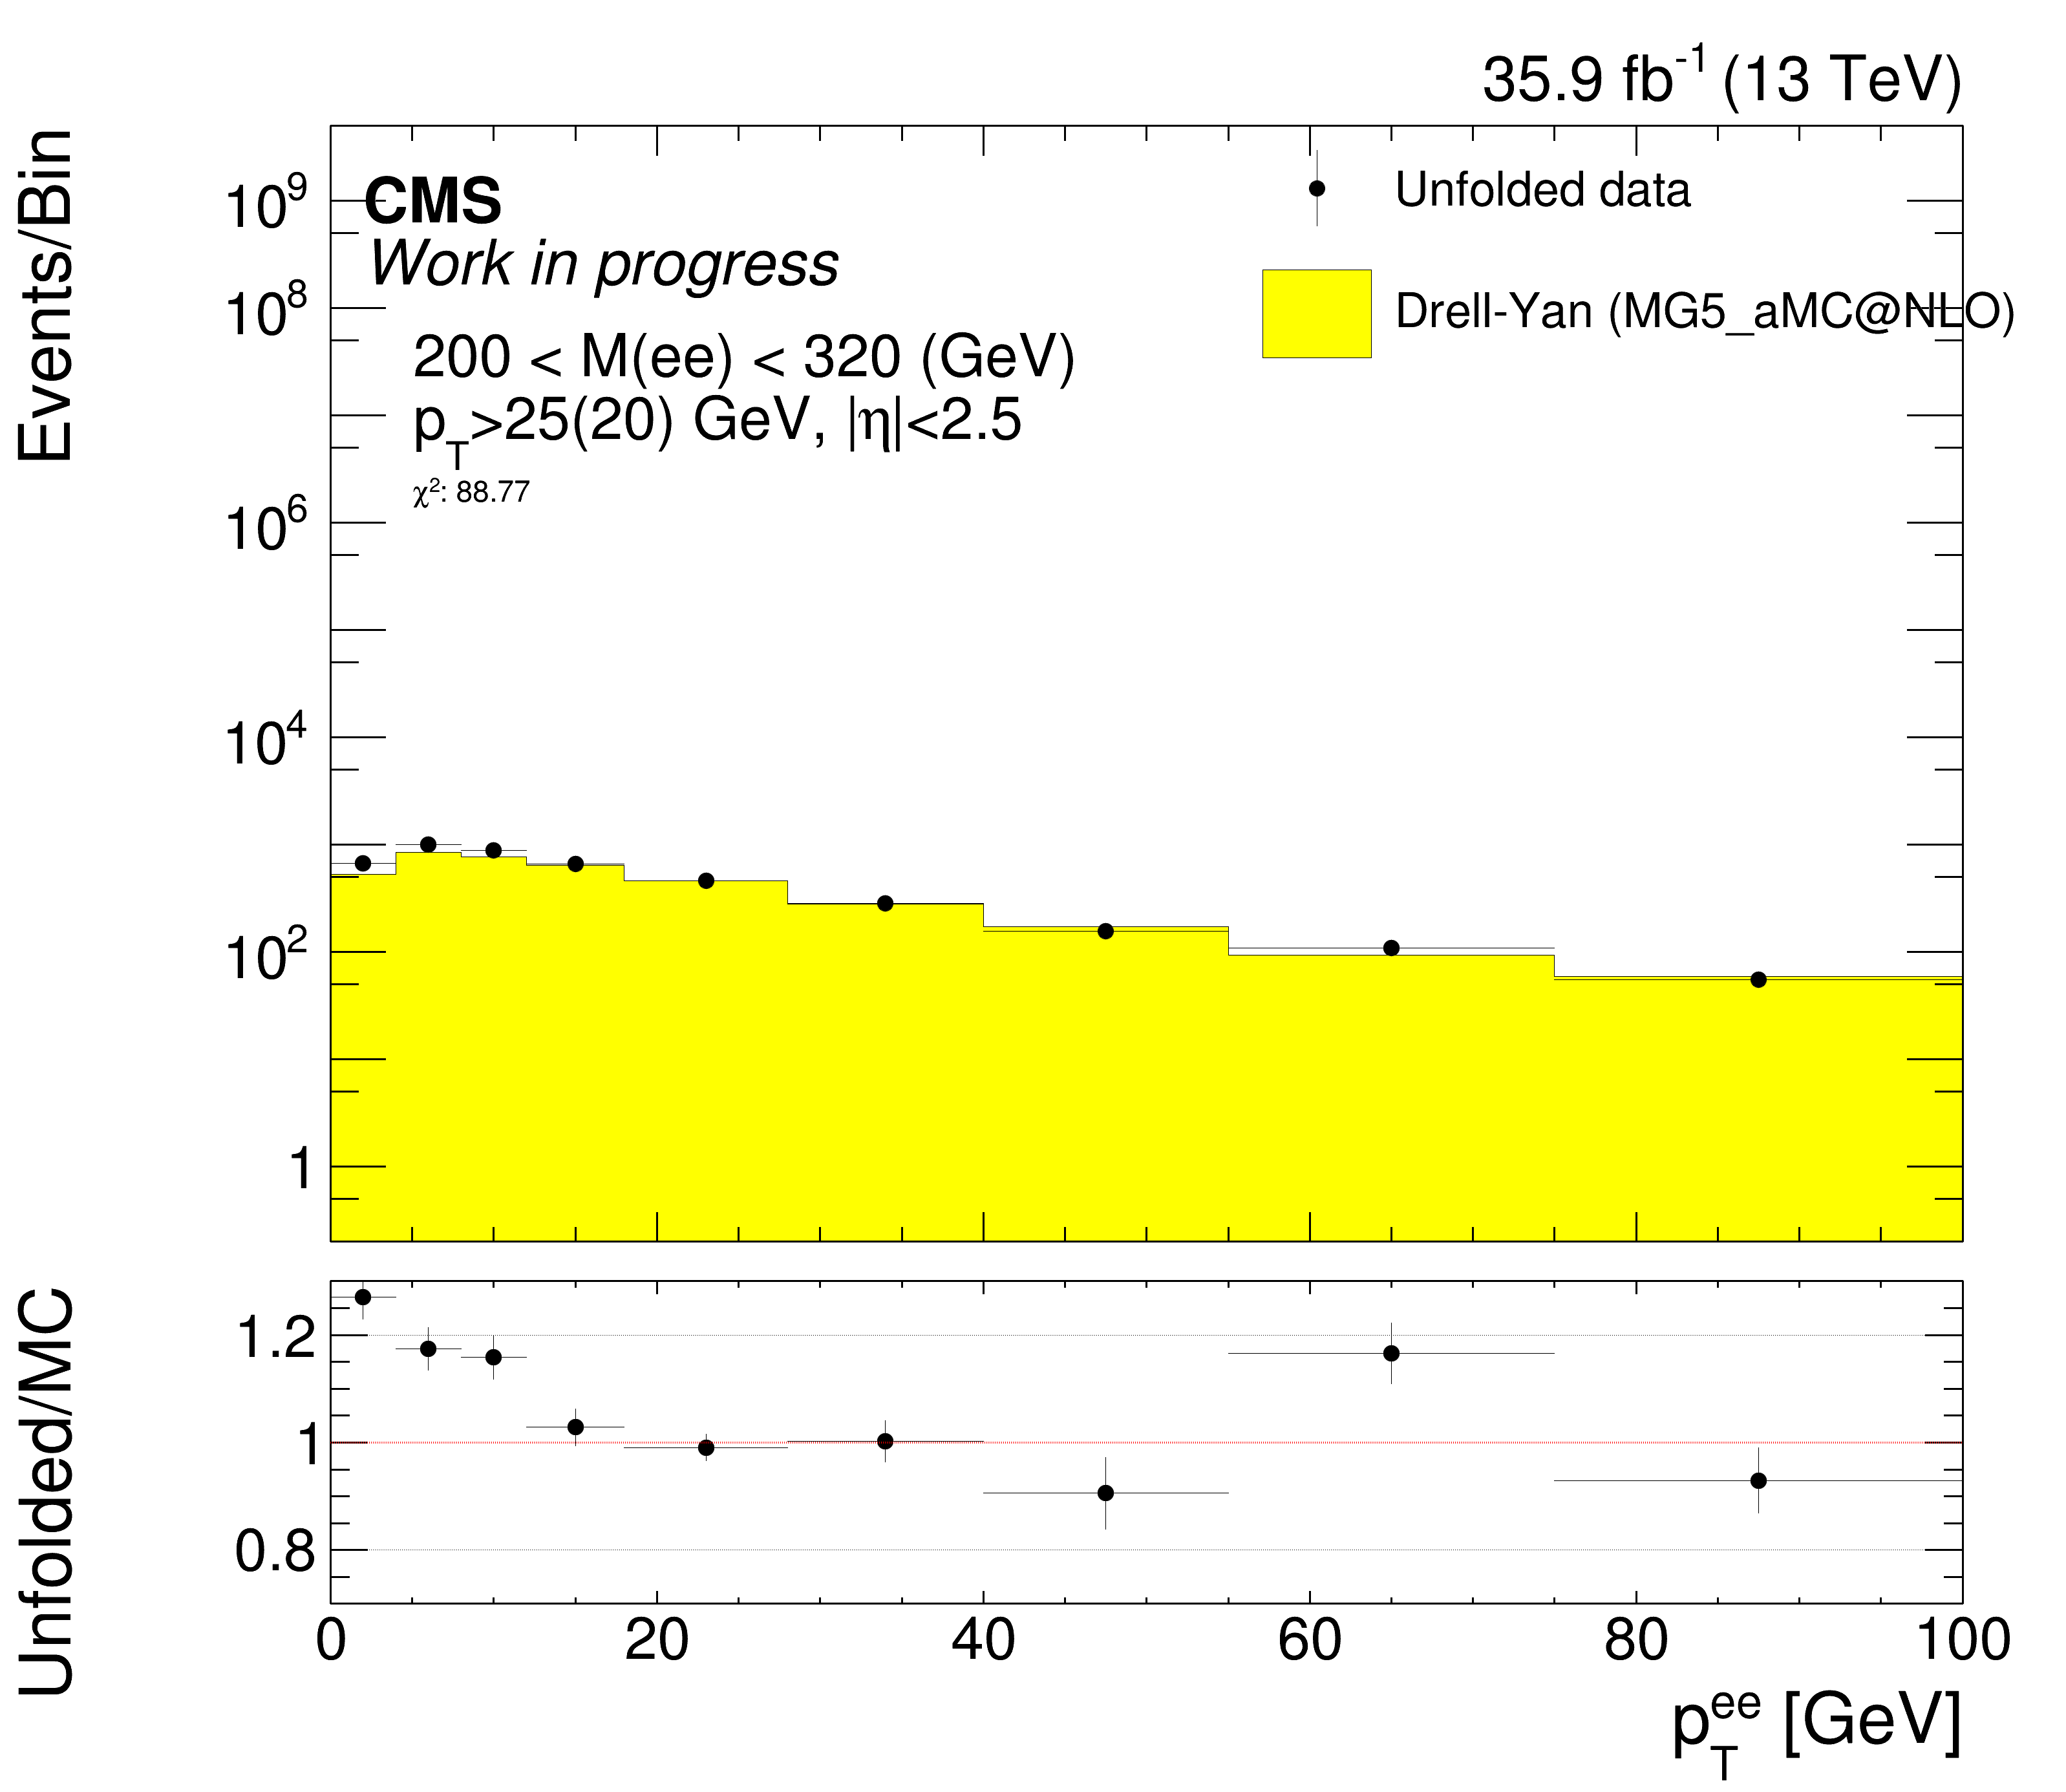

In [16]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DetUnfDiPt_M"+str(massBin), massBin, True)

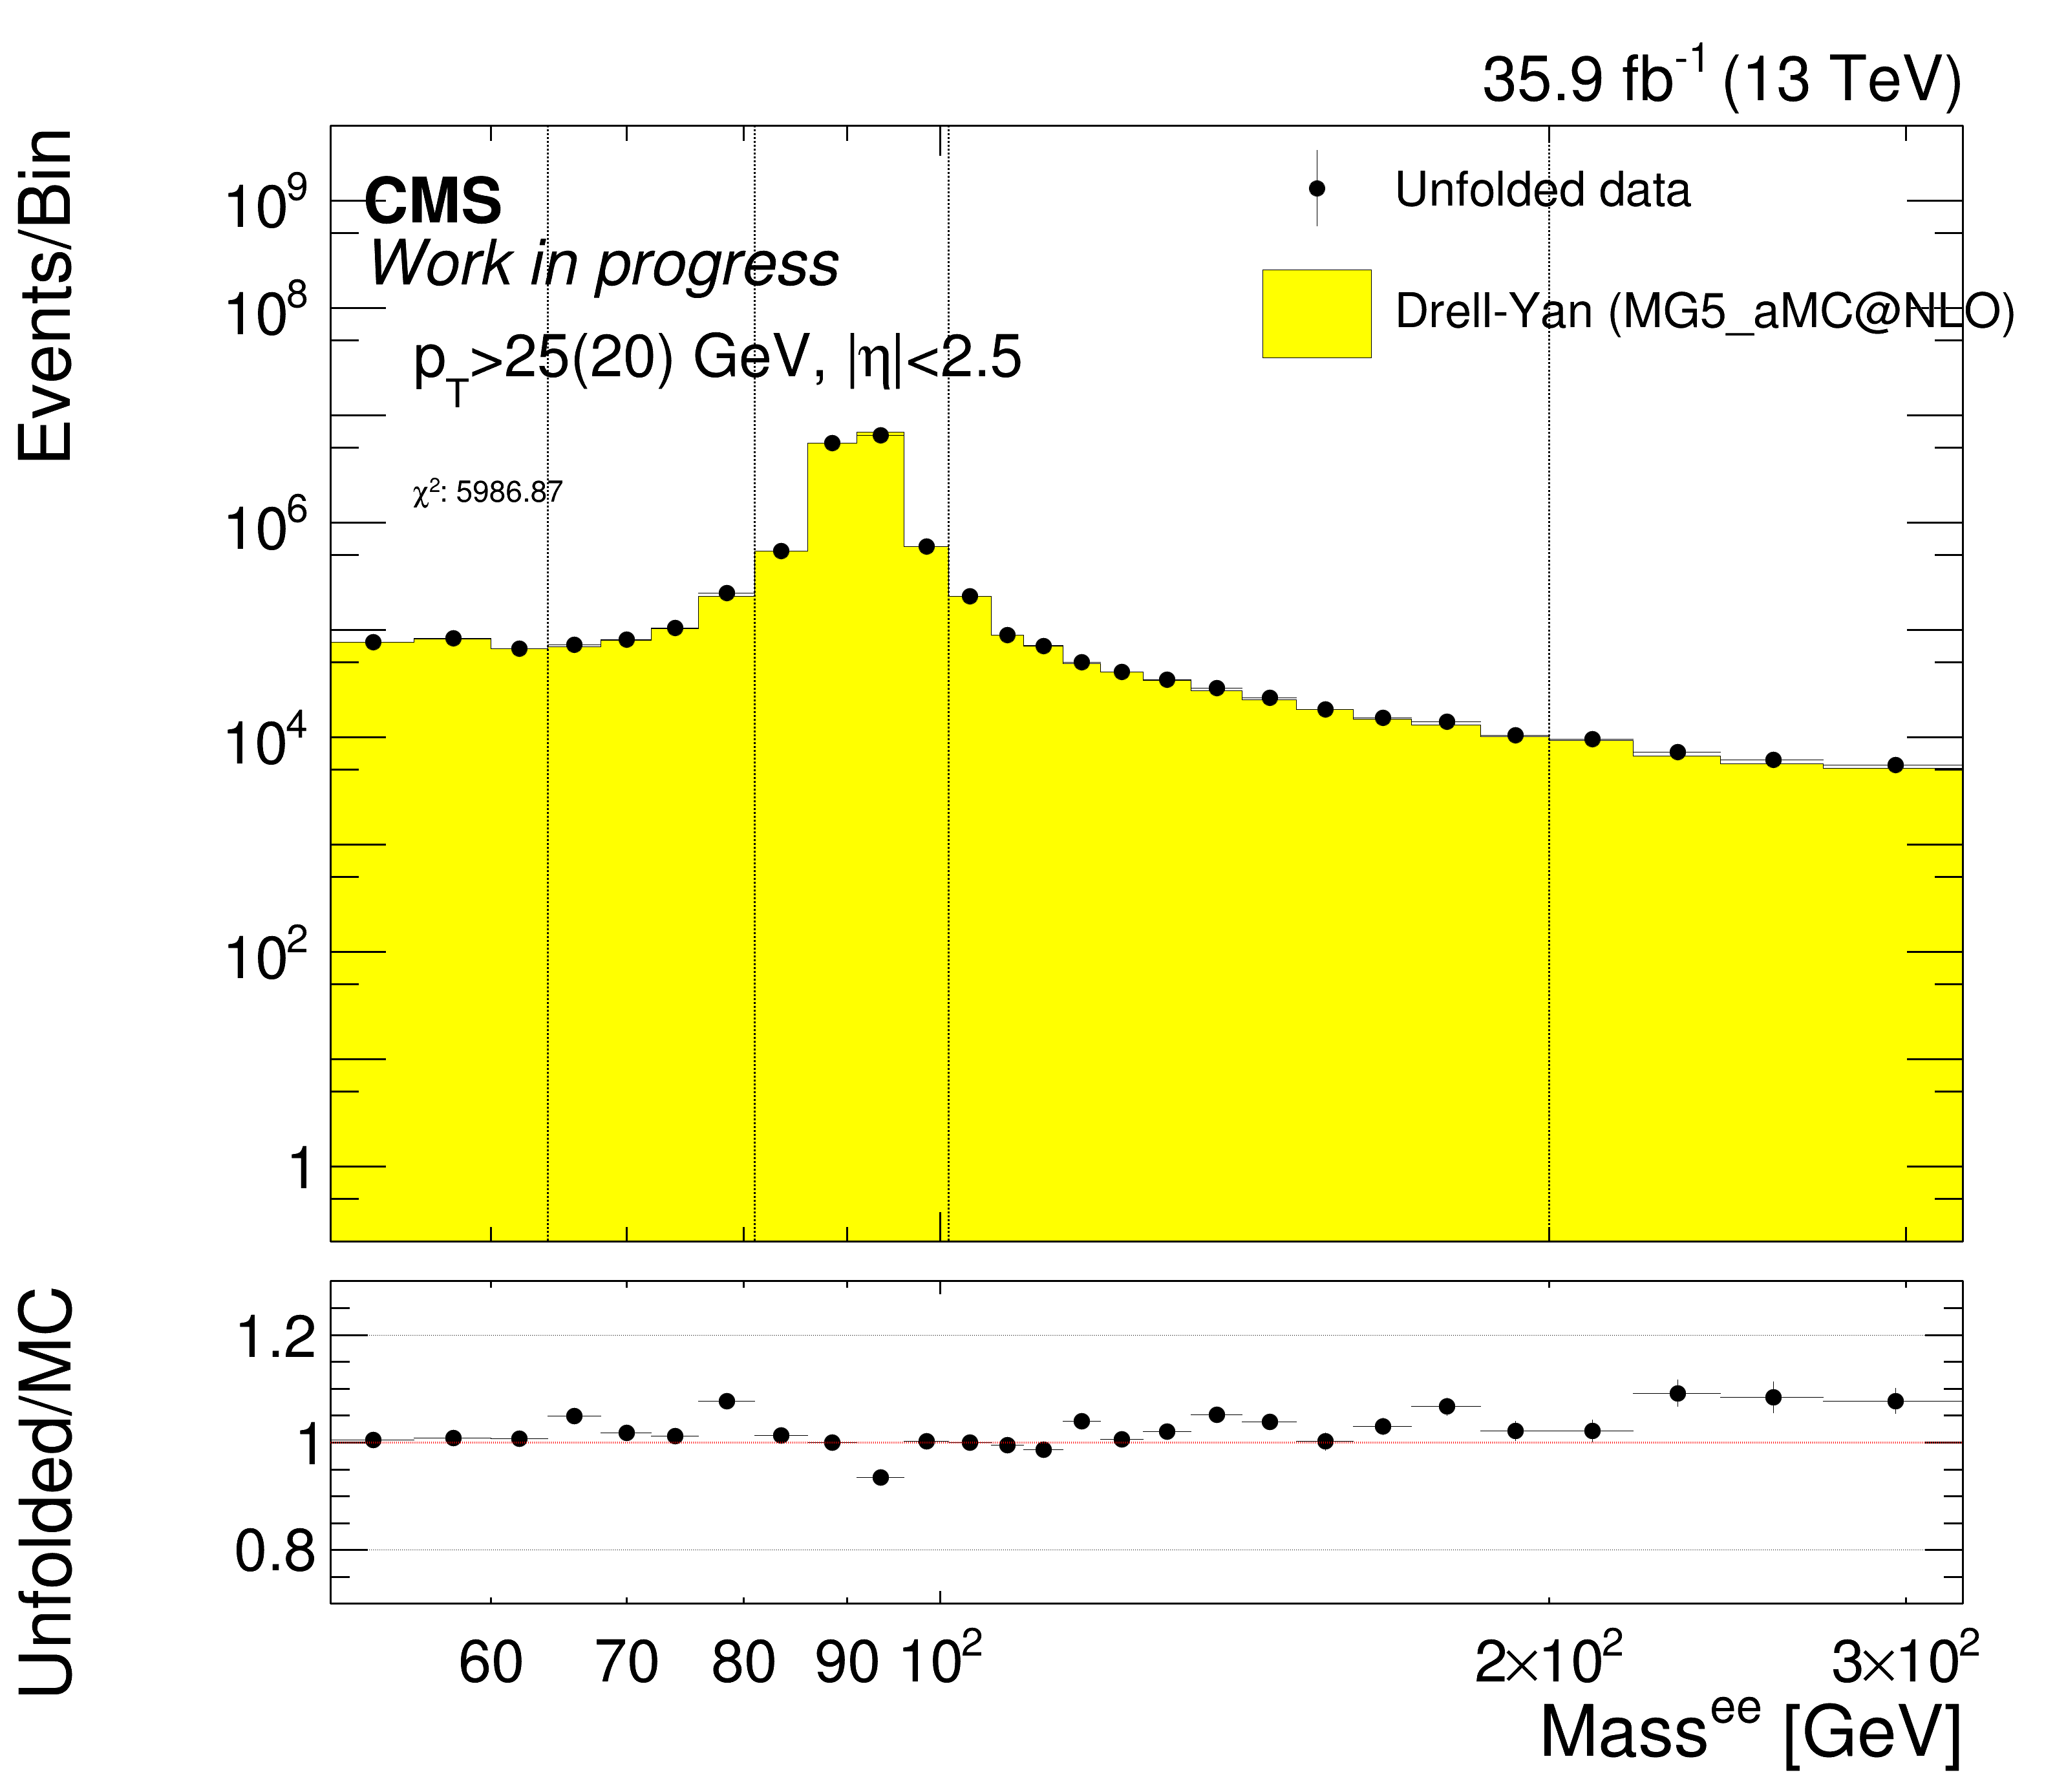

In [17]:
Unfold_muon_2016_oneStep.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

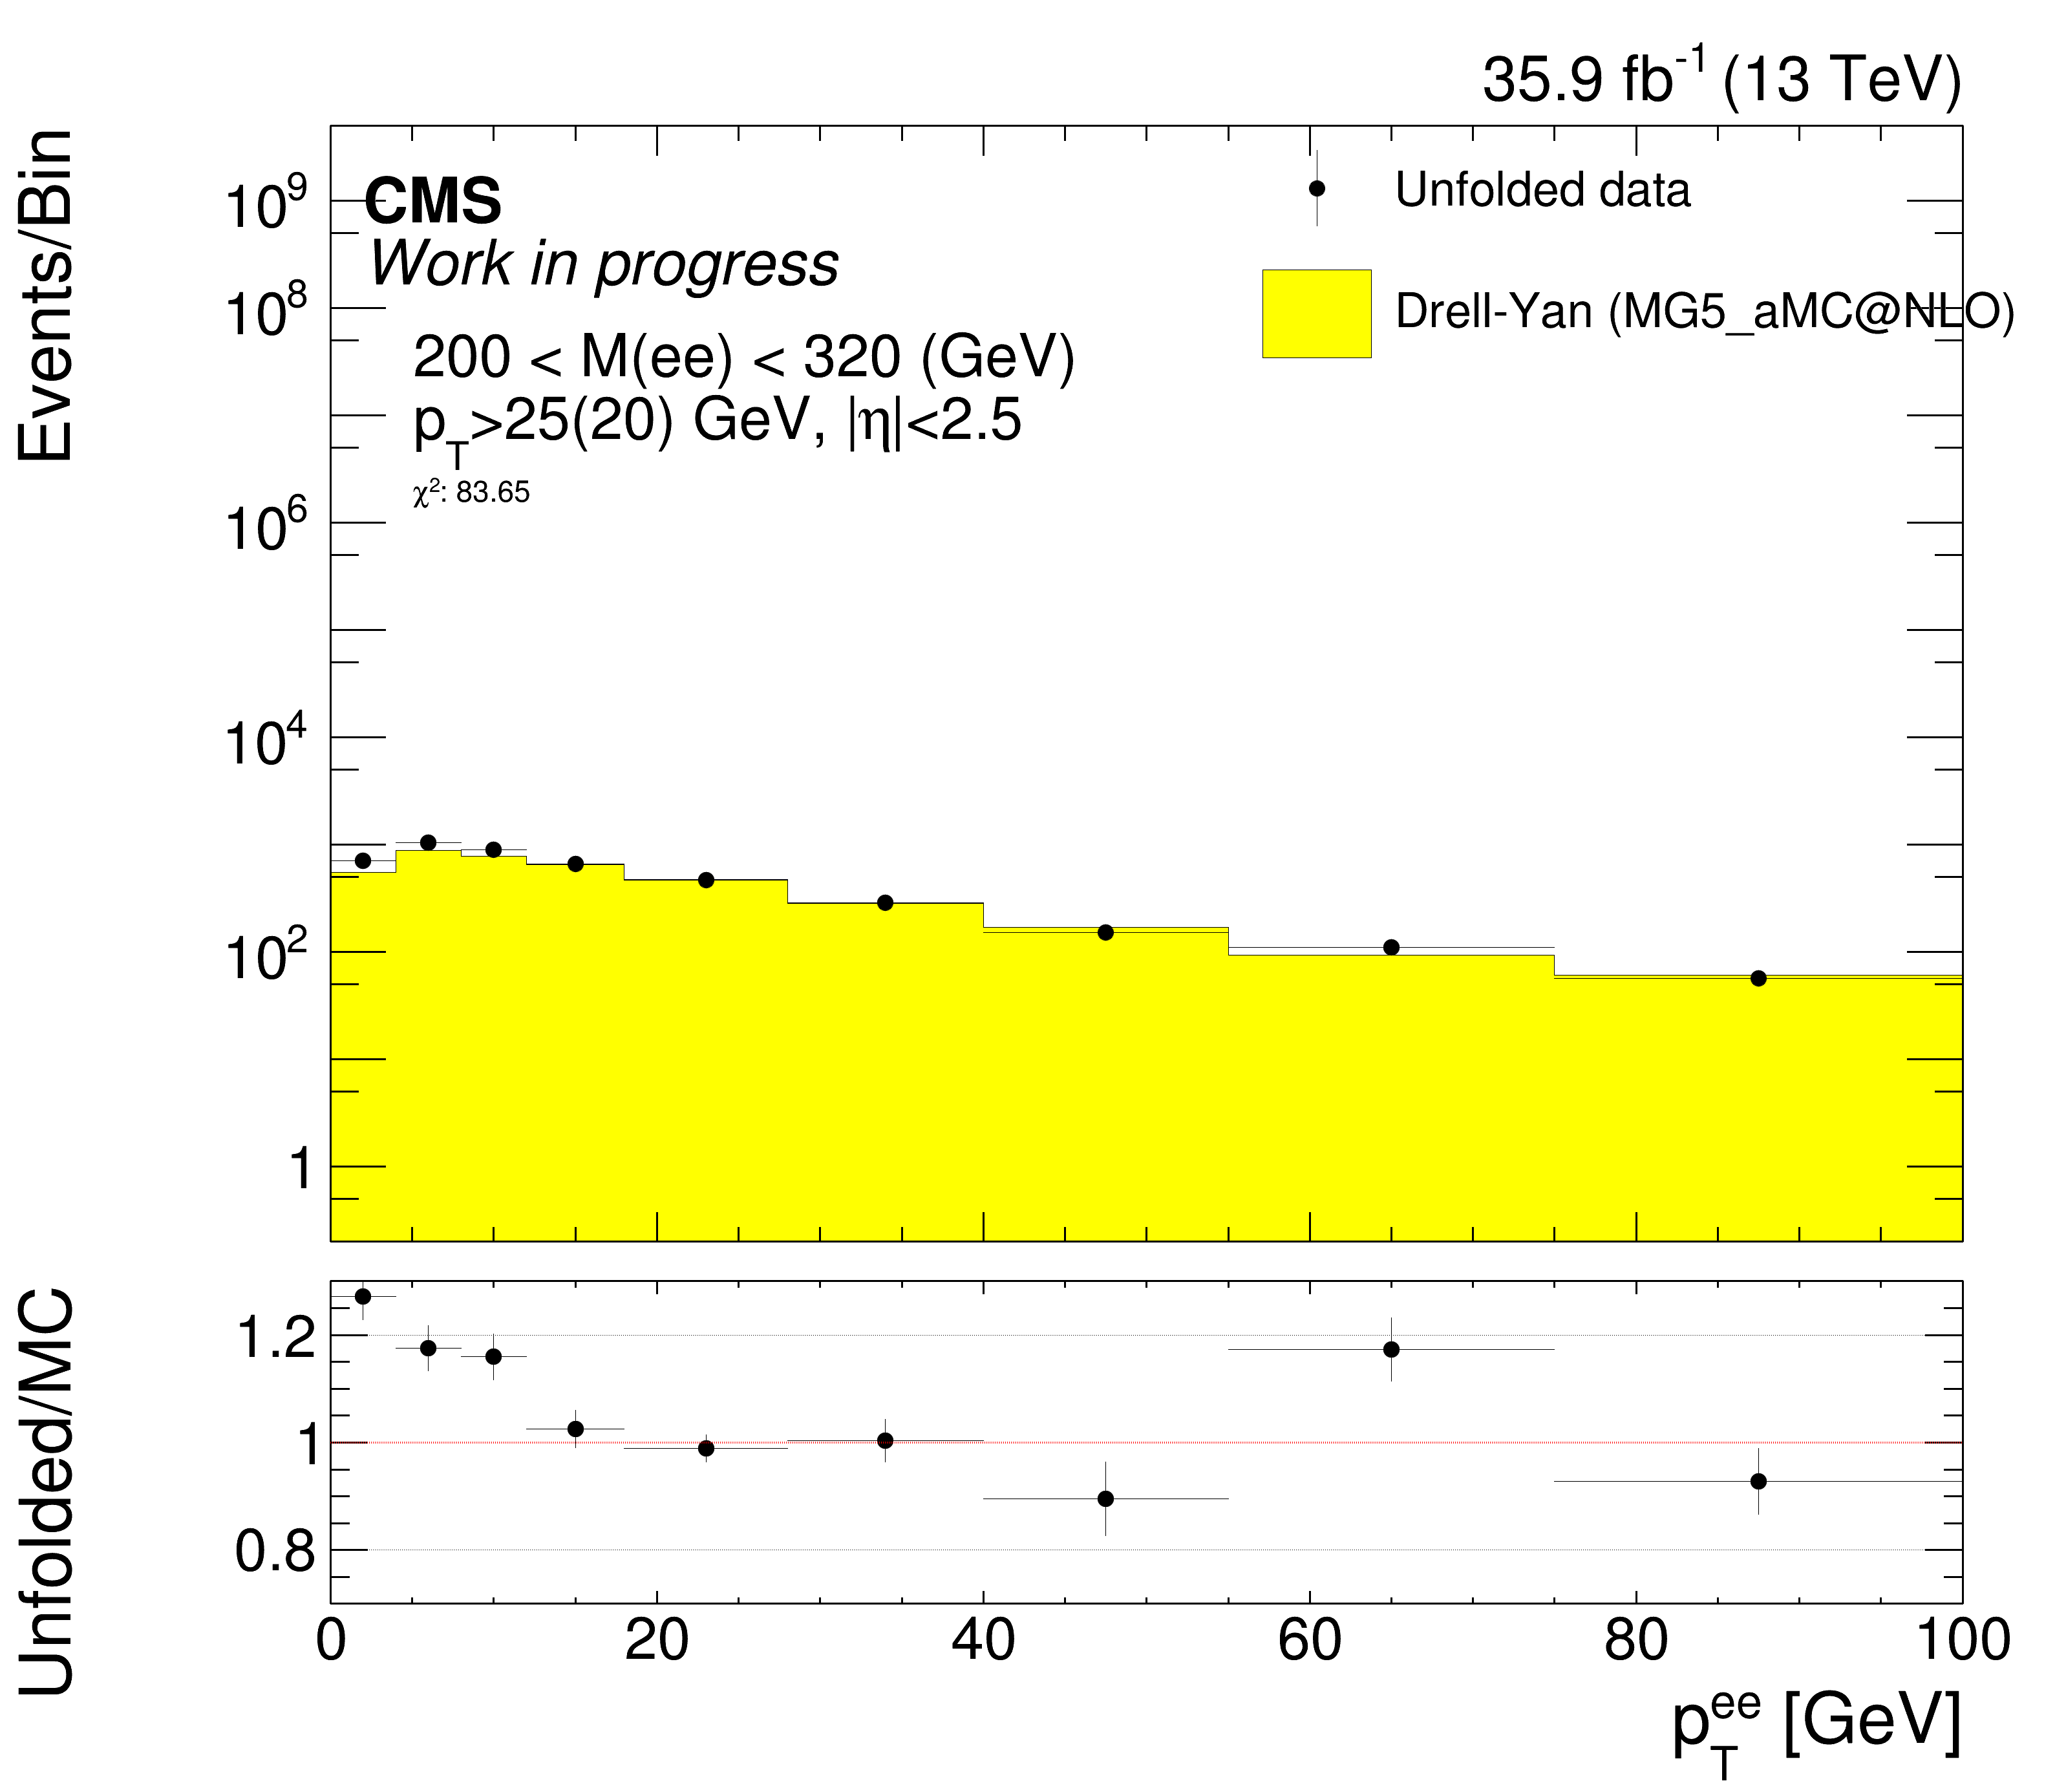

In [18]:
for massBin in range(5):
    Unfold_muon_2016_oneStep.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "OneStePUnfDiPt_M"+str(massBin), massBin, True)

In [19]:
detUnfold_muon_2016.setMeanValues()
if doSys:
    detUnfold_muon_2016.setSysMeanValues()
    detUnfold_muon_2016.setSysError()
    detUnfold_muon_2016.setTotSysError()

Unfold_muon_2016_oneStep.setMeanValues()
if doSys:
    Unfold_muon_2016_oneStep.setSysMeanValues()
    Unfold_muon_2016_oneStep.setSysError()
    Unfold_muon_2016_oneStep.setTotSysError()

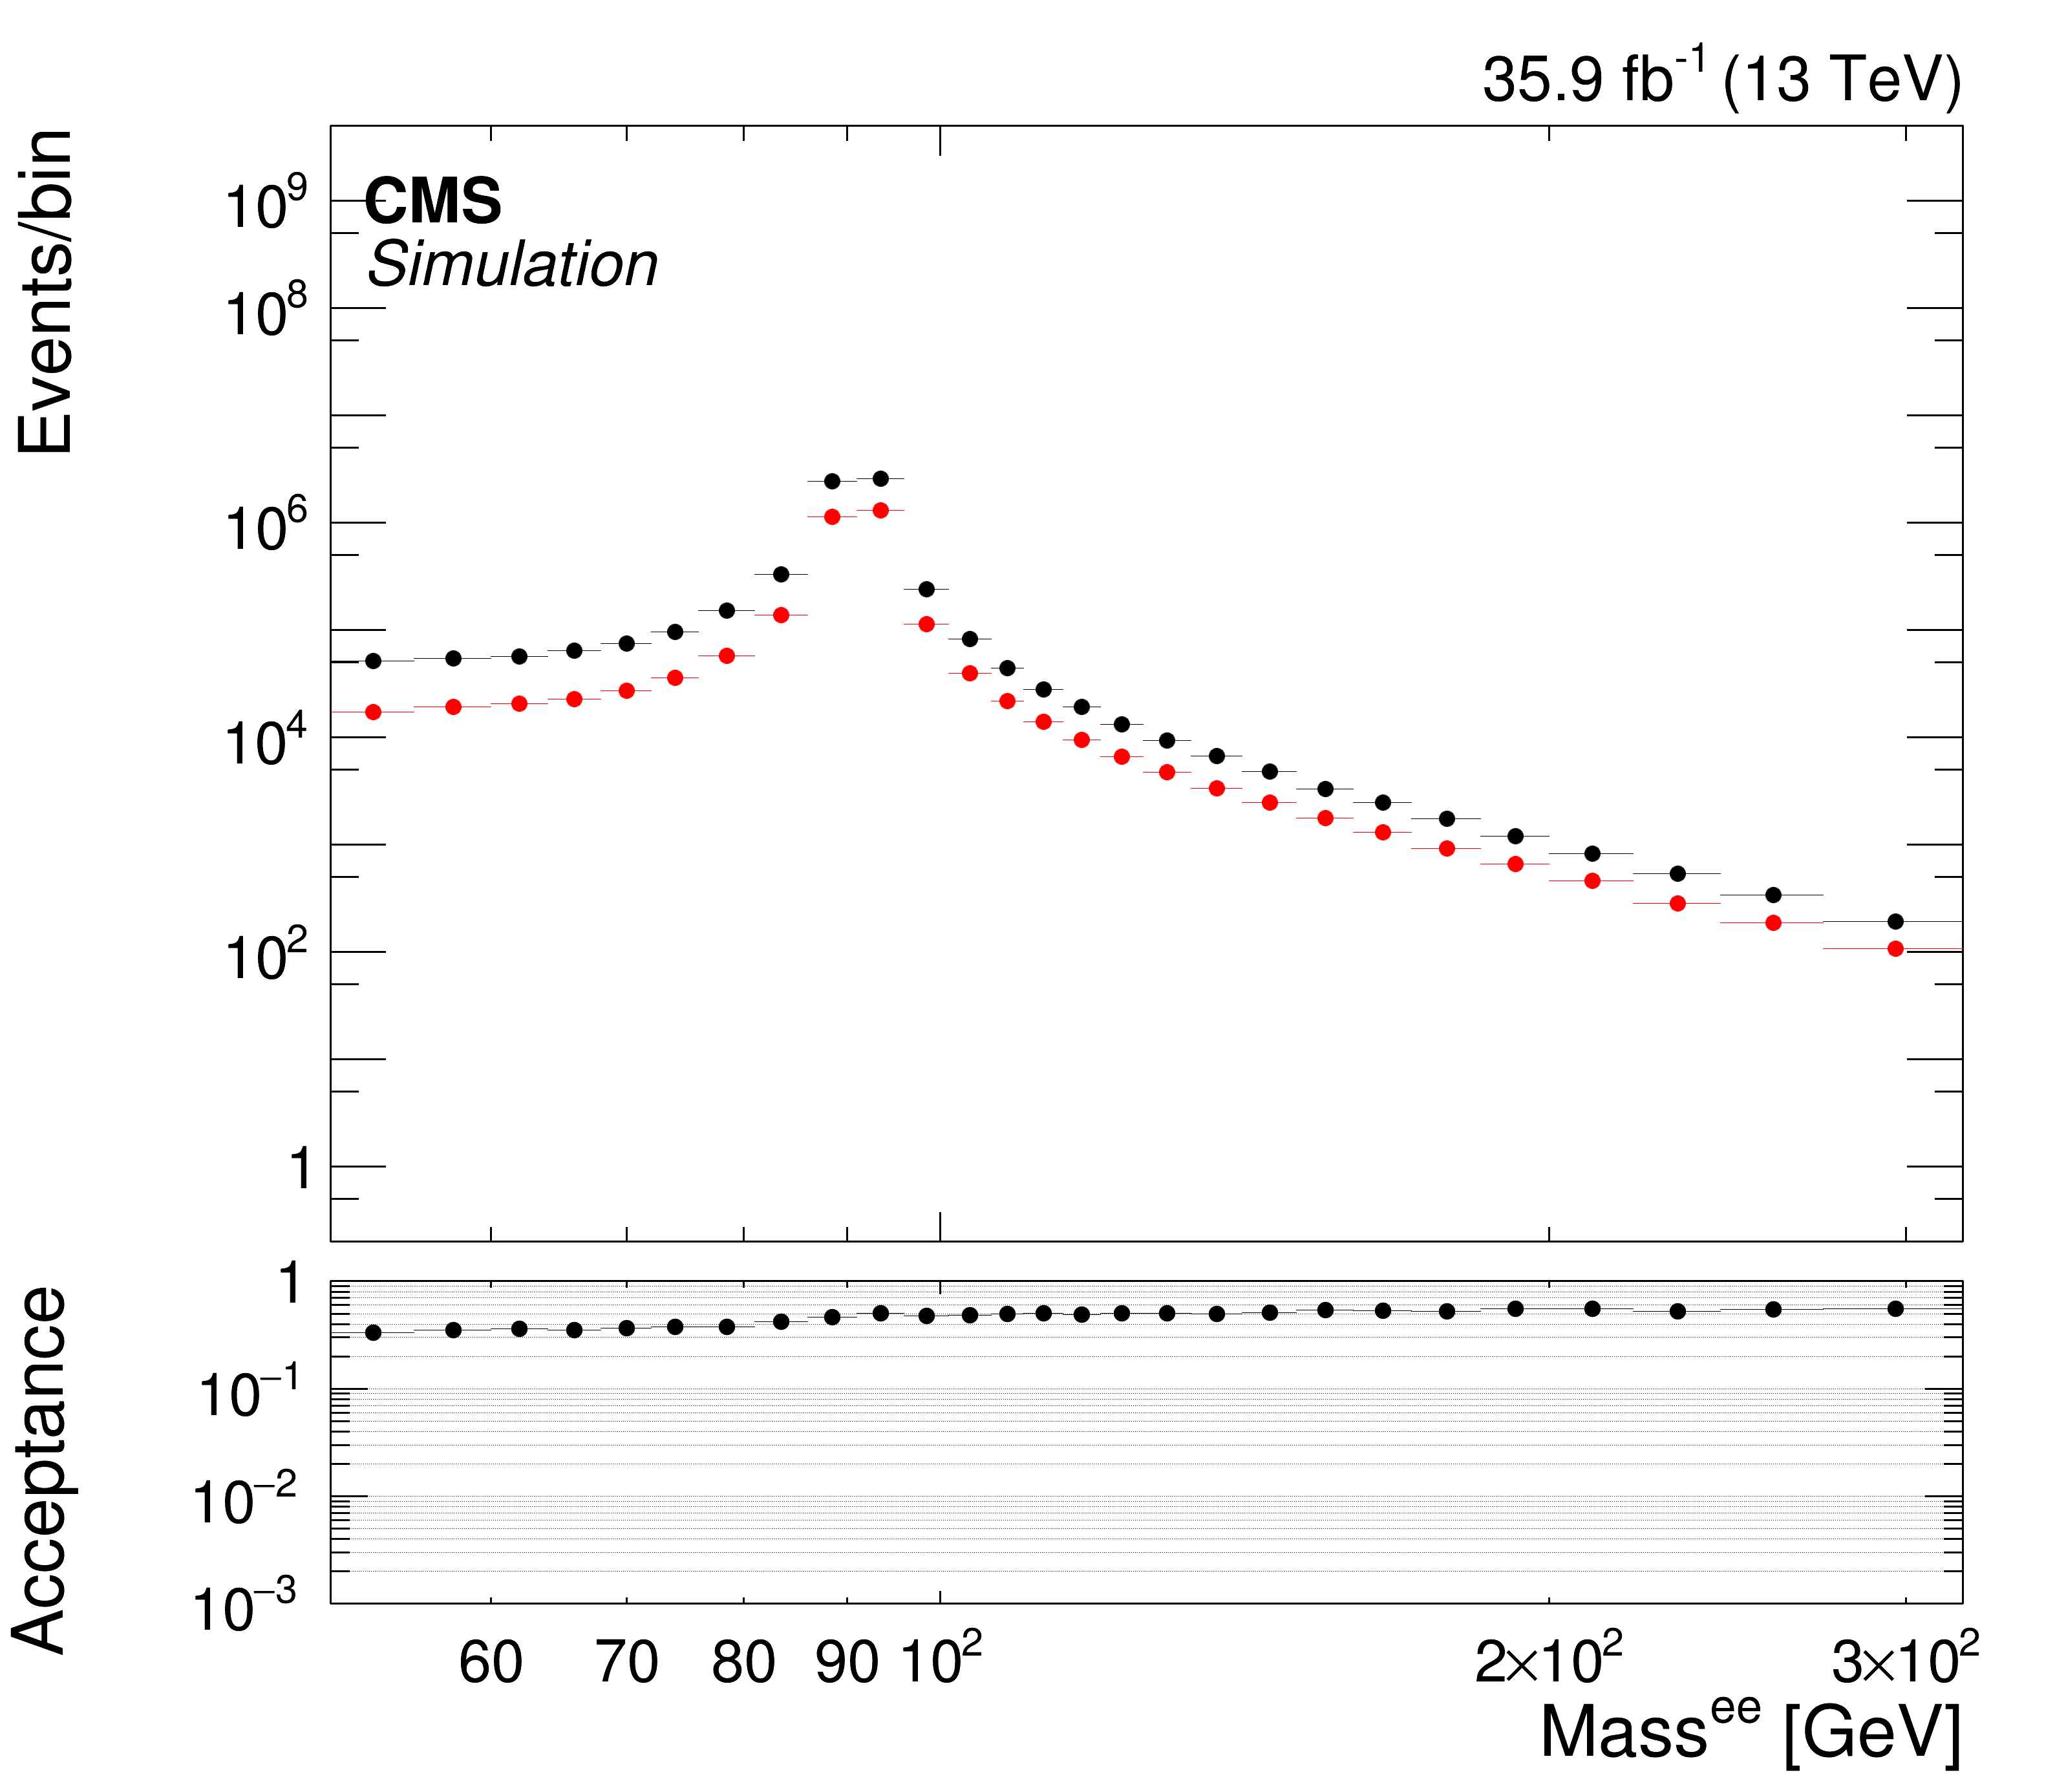

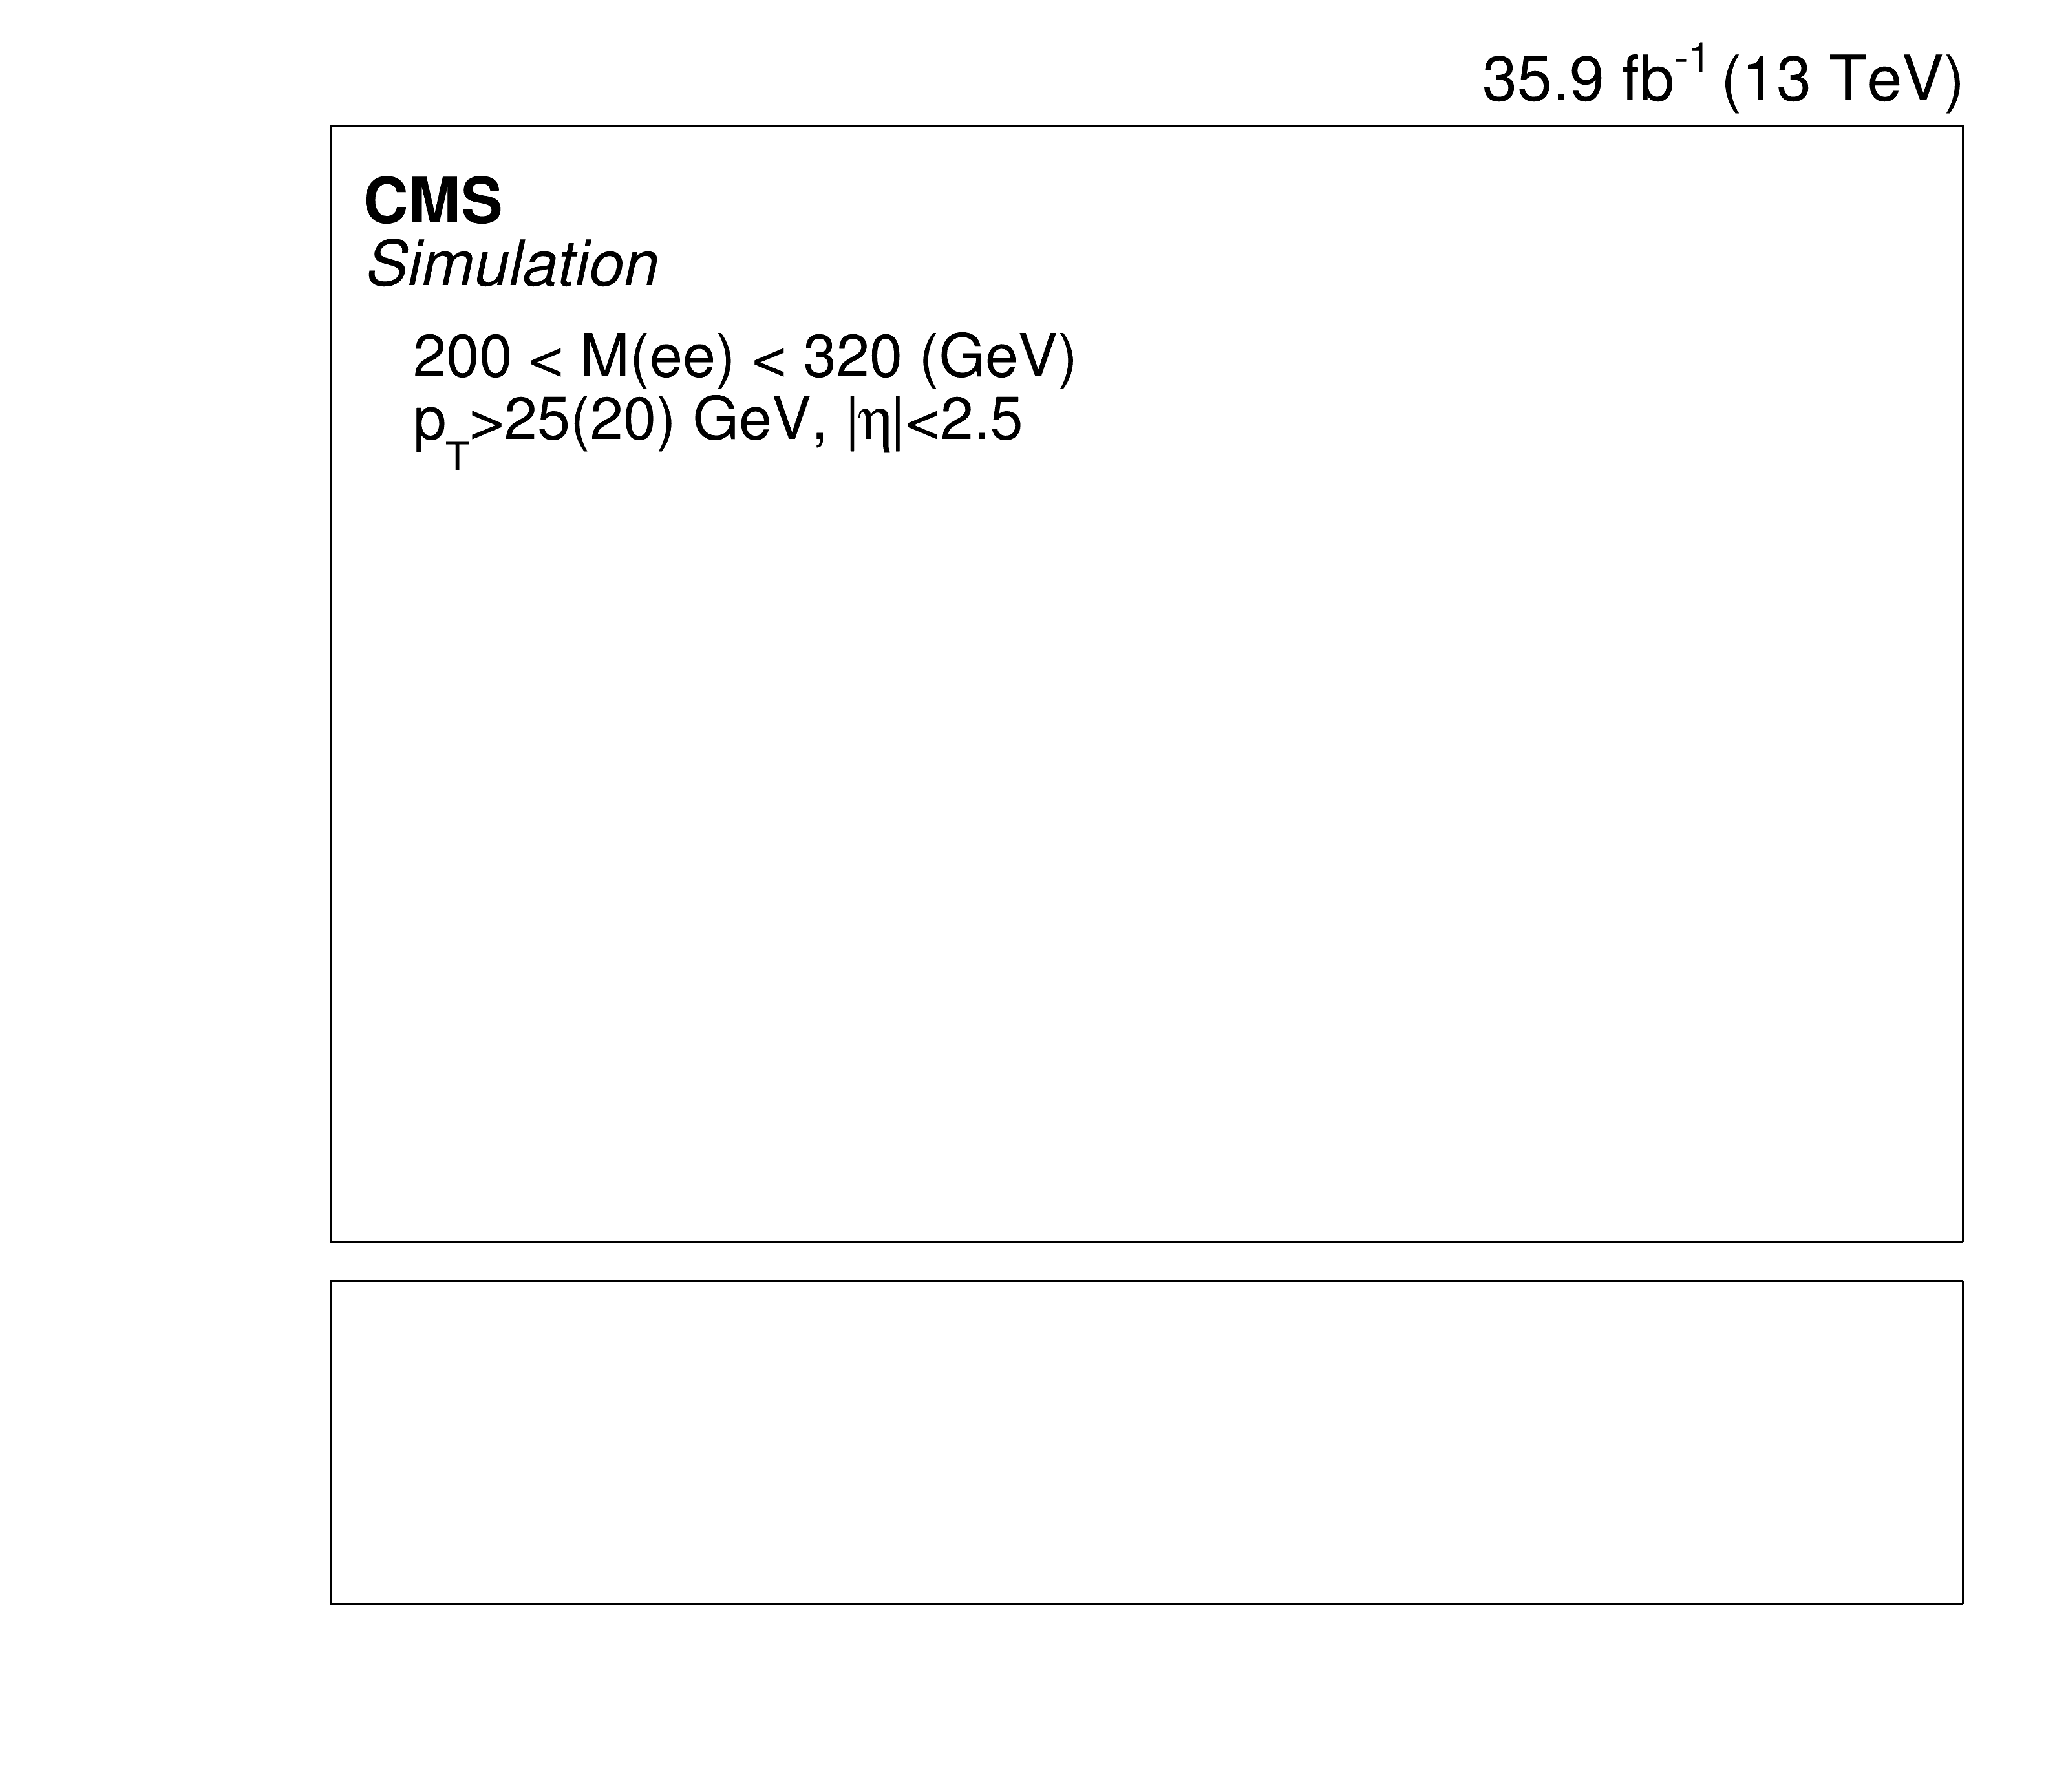

In [20]:
detUnfold_muon_2016.doAcceptance(doSys)

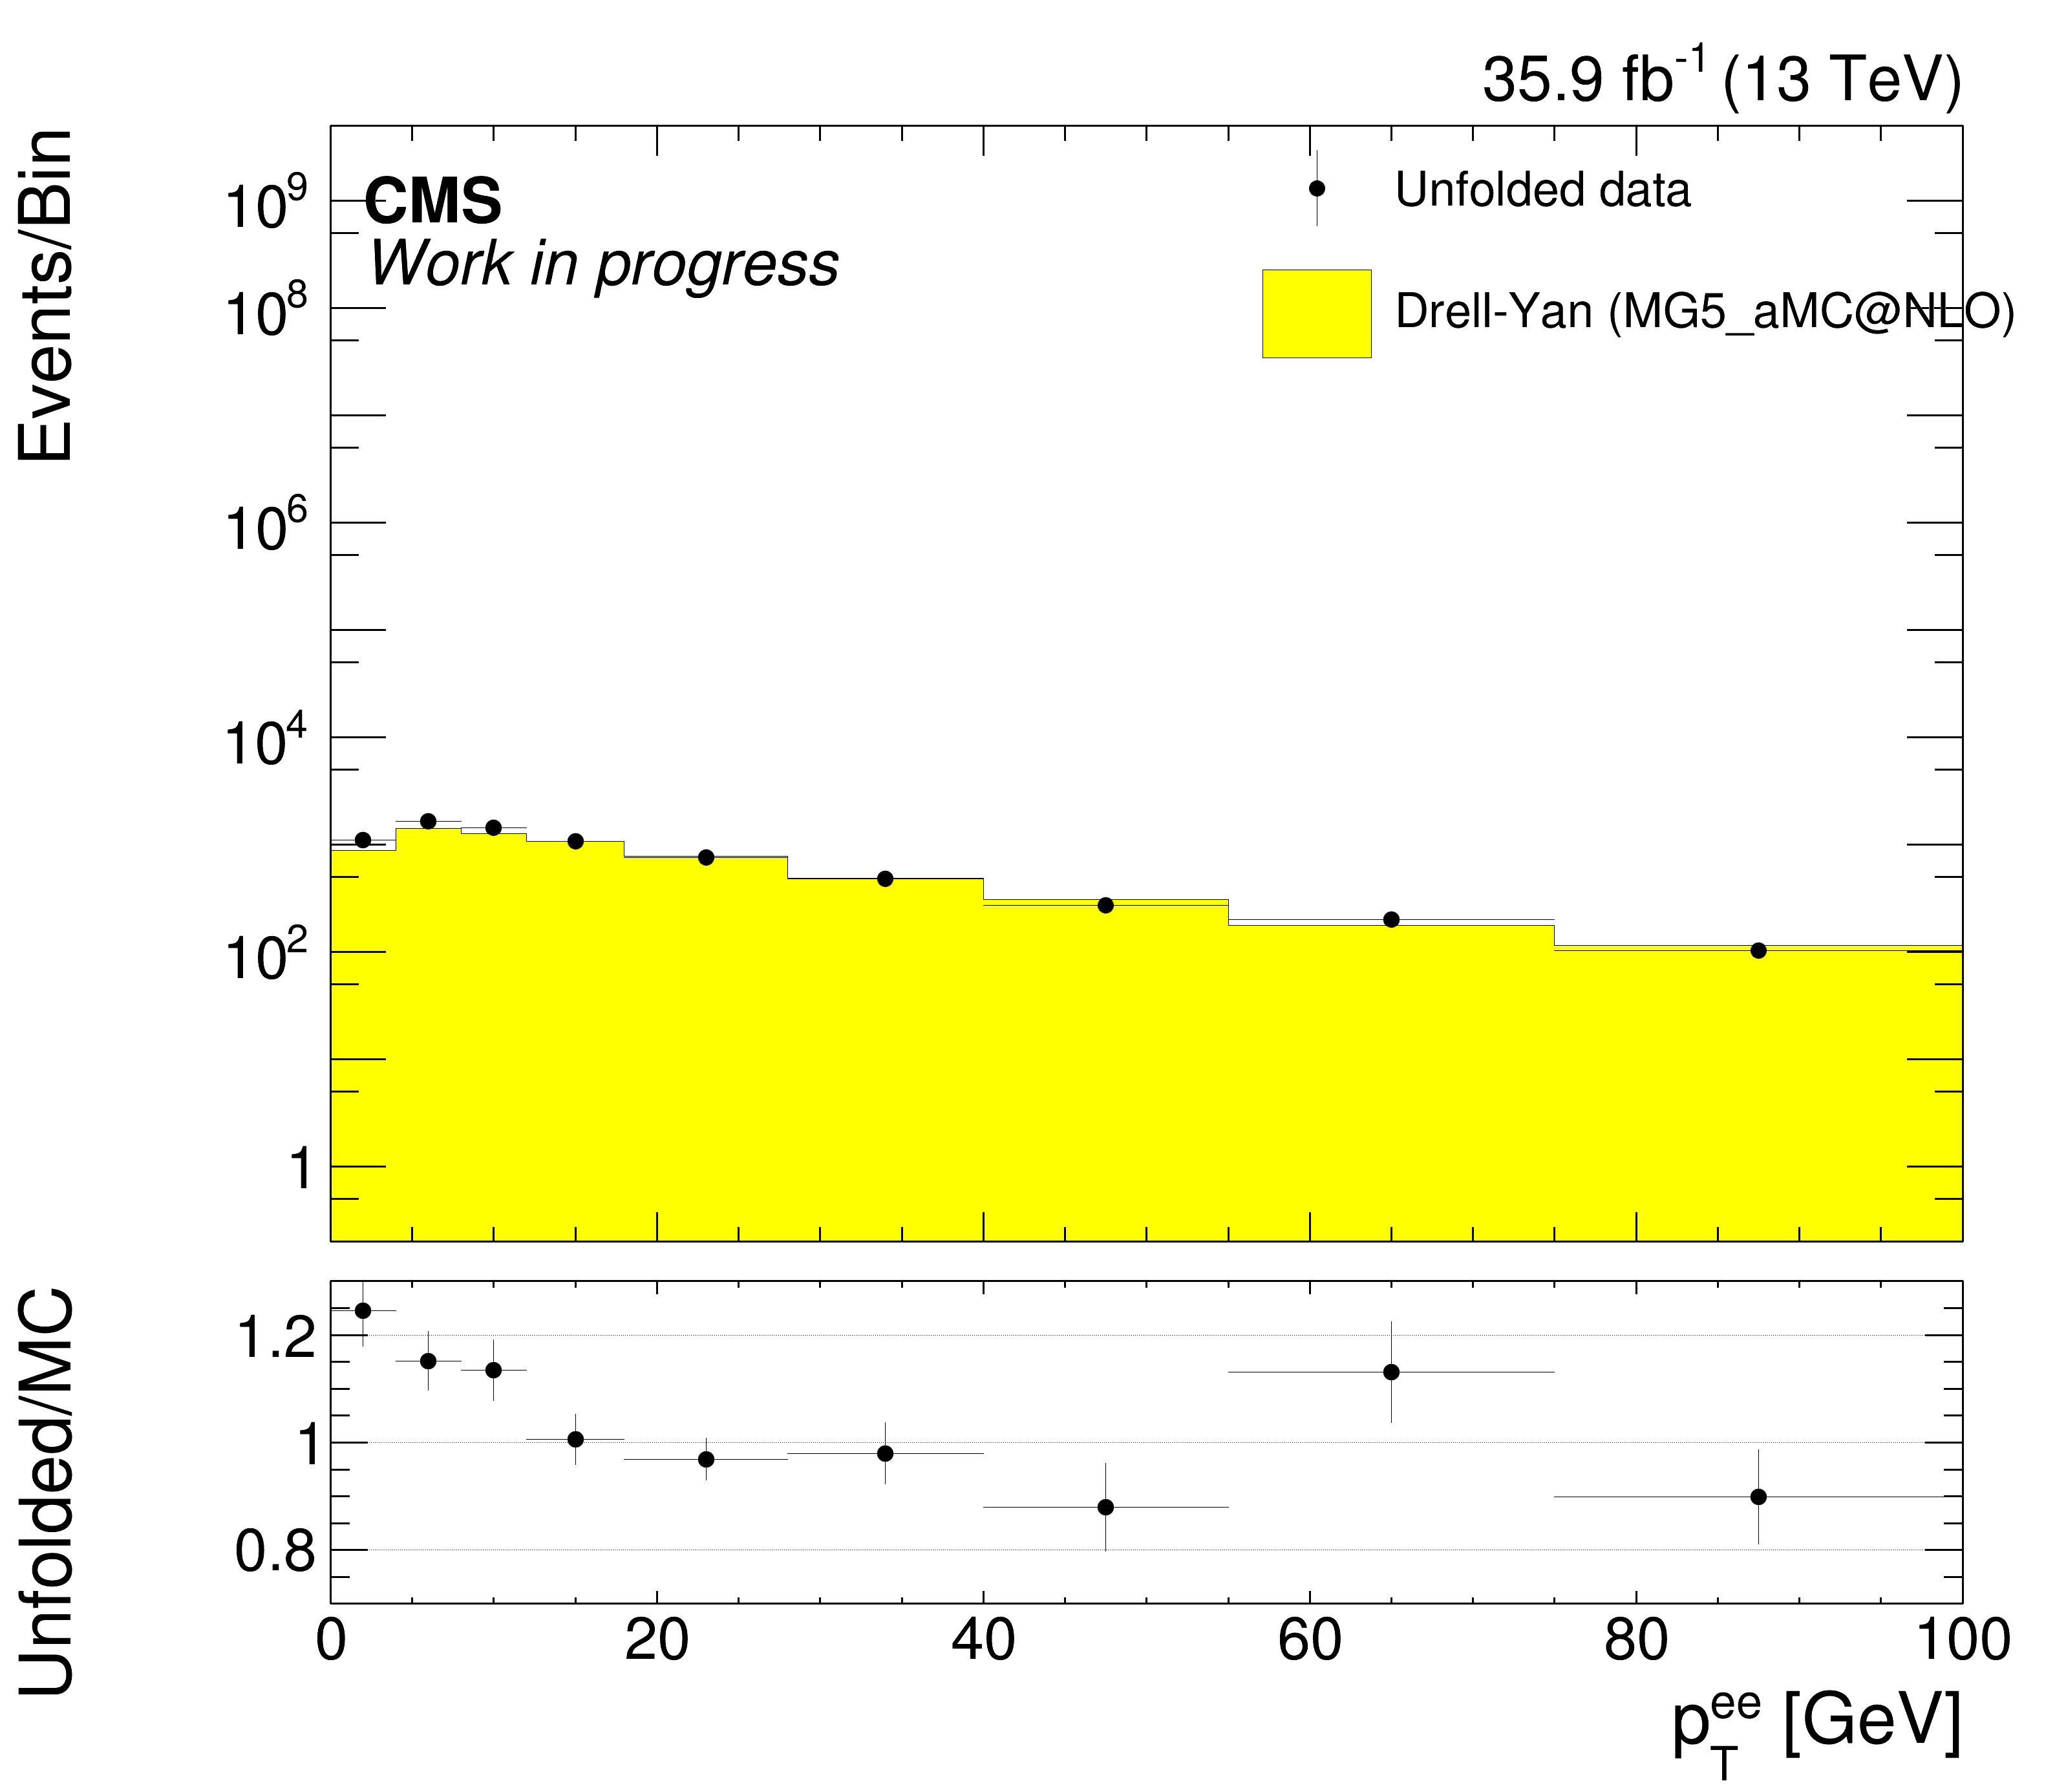

In [21]:
for massBin in range(5):
    detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "ID", "AcceptPt_M"+str(massBin), massBin, True)

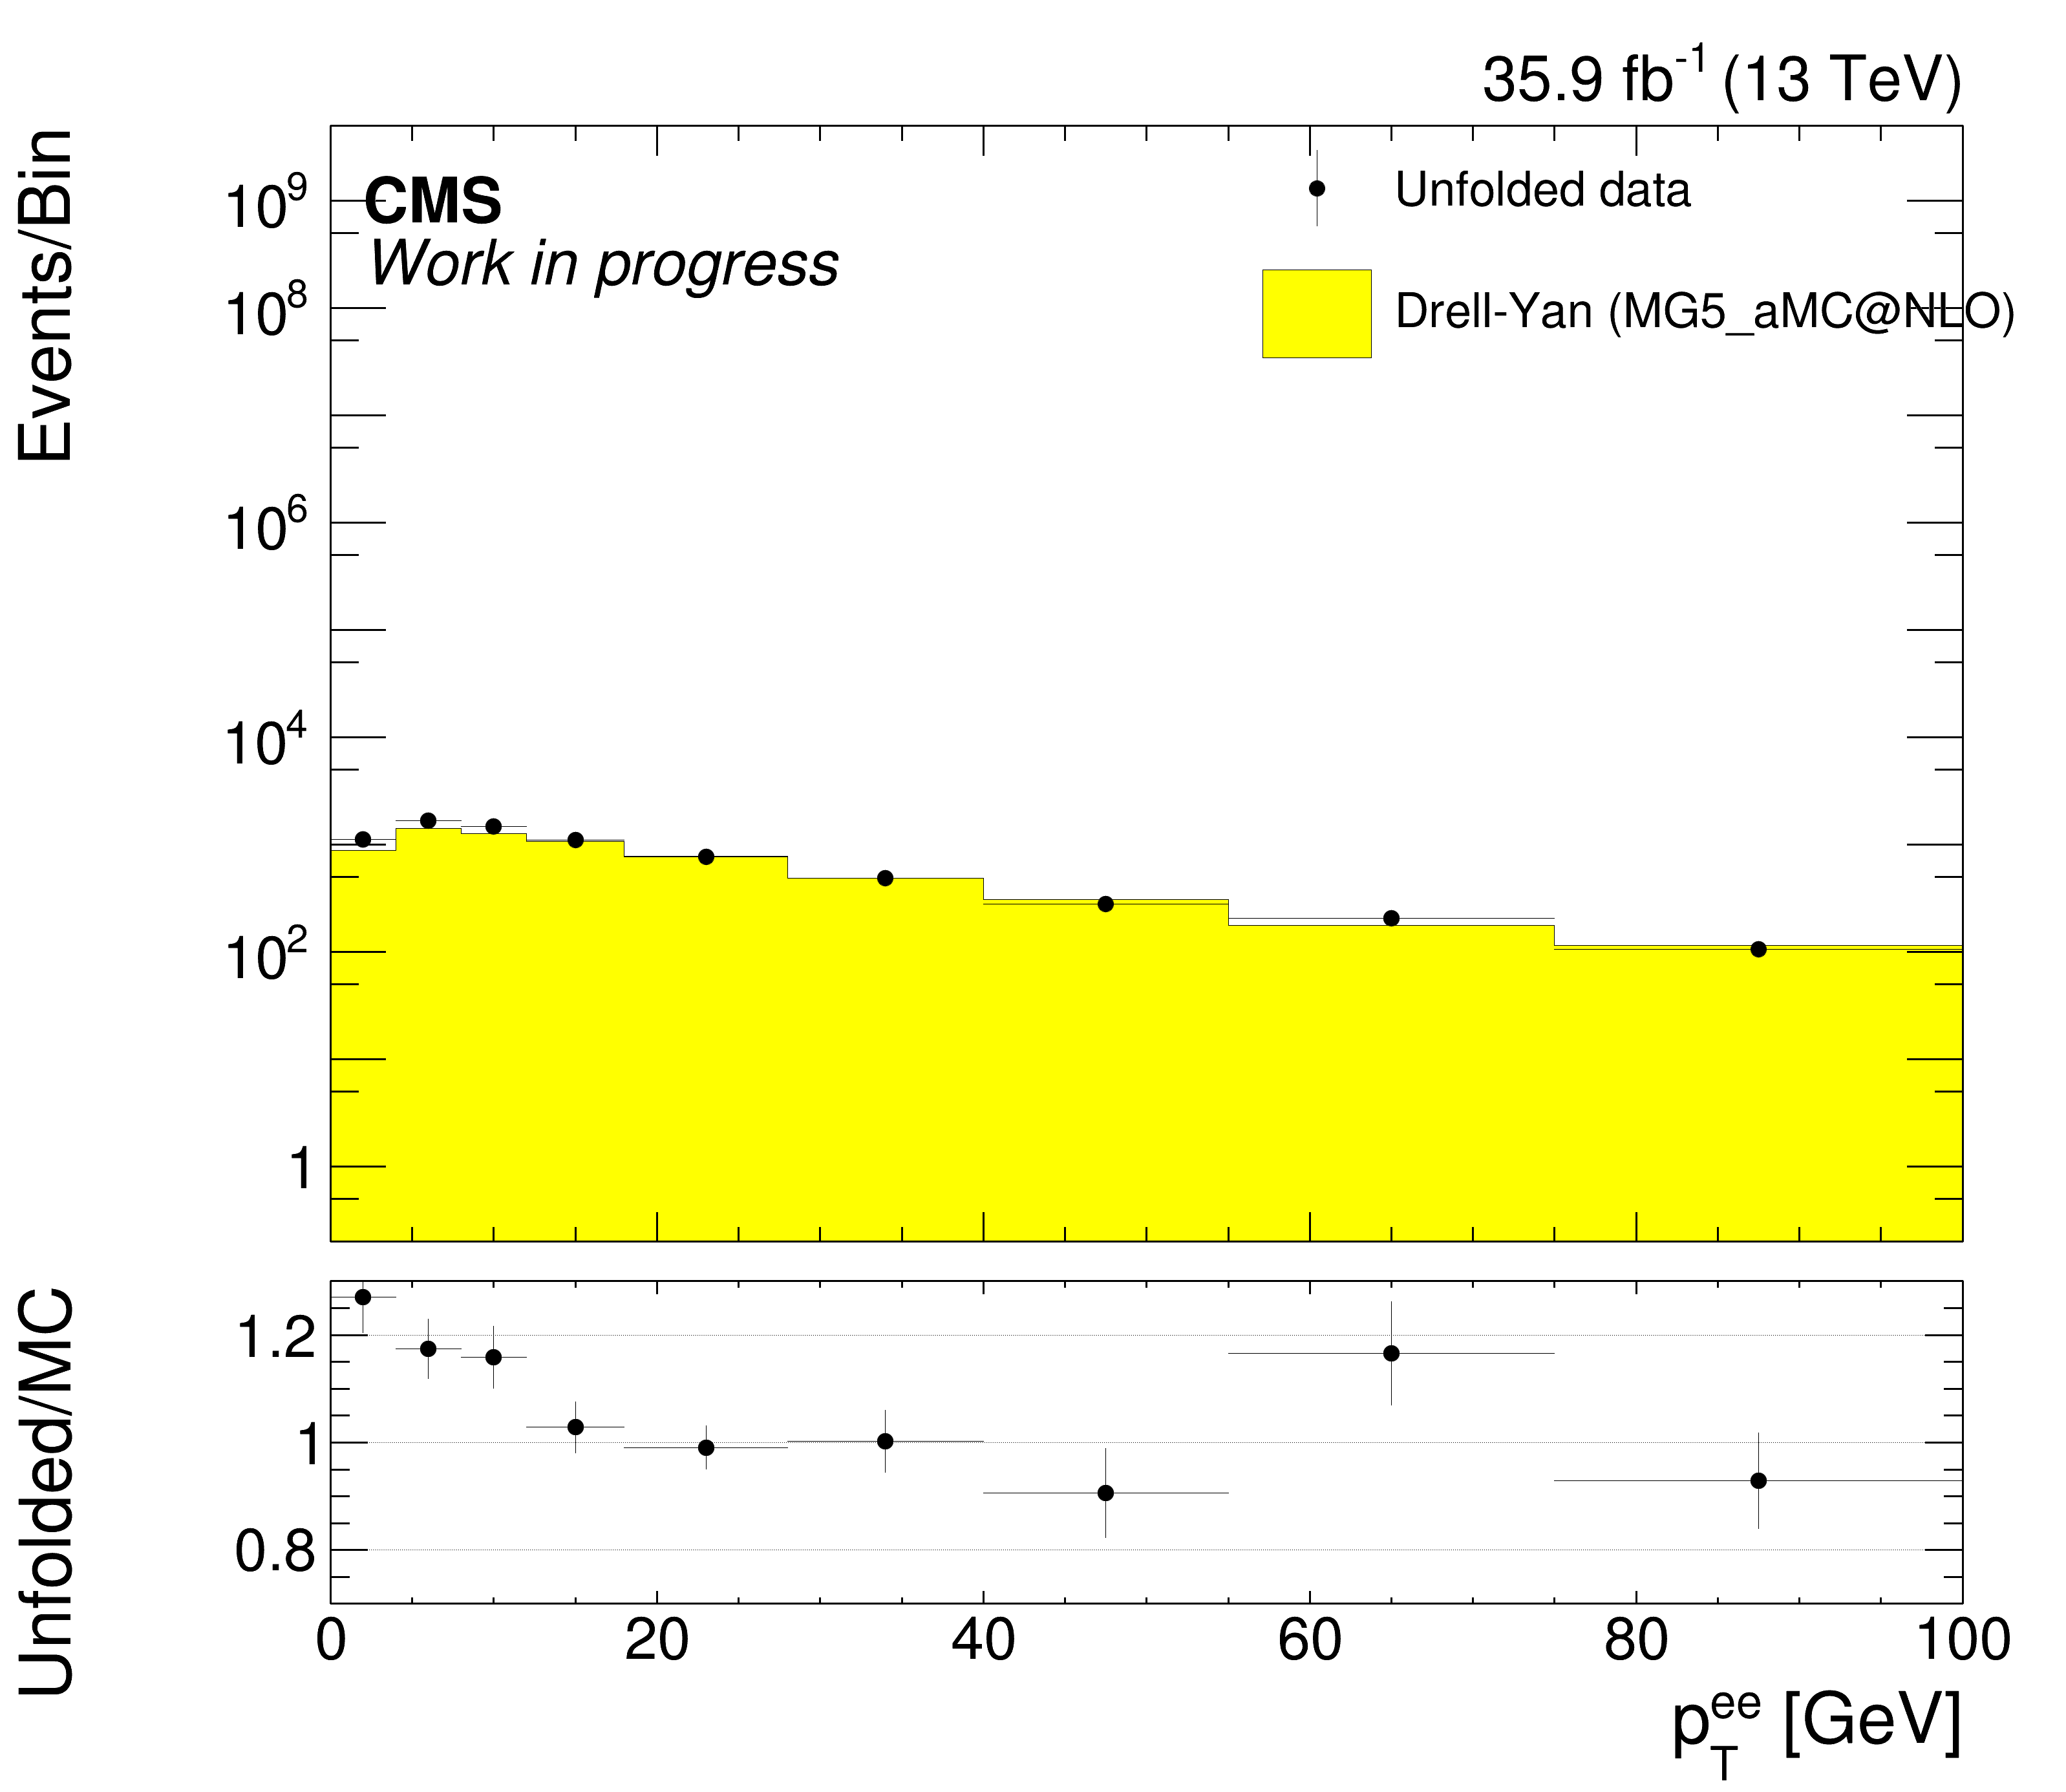

In [22]:
for massBin in range(5):
    detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "AcceptPt_M"+str(massBin), massBin, True)

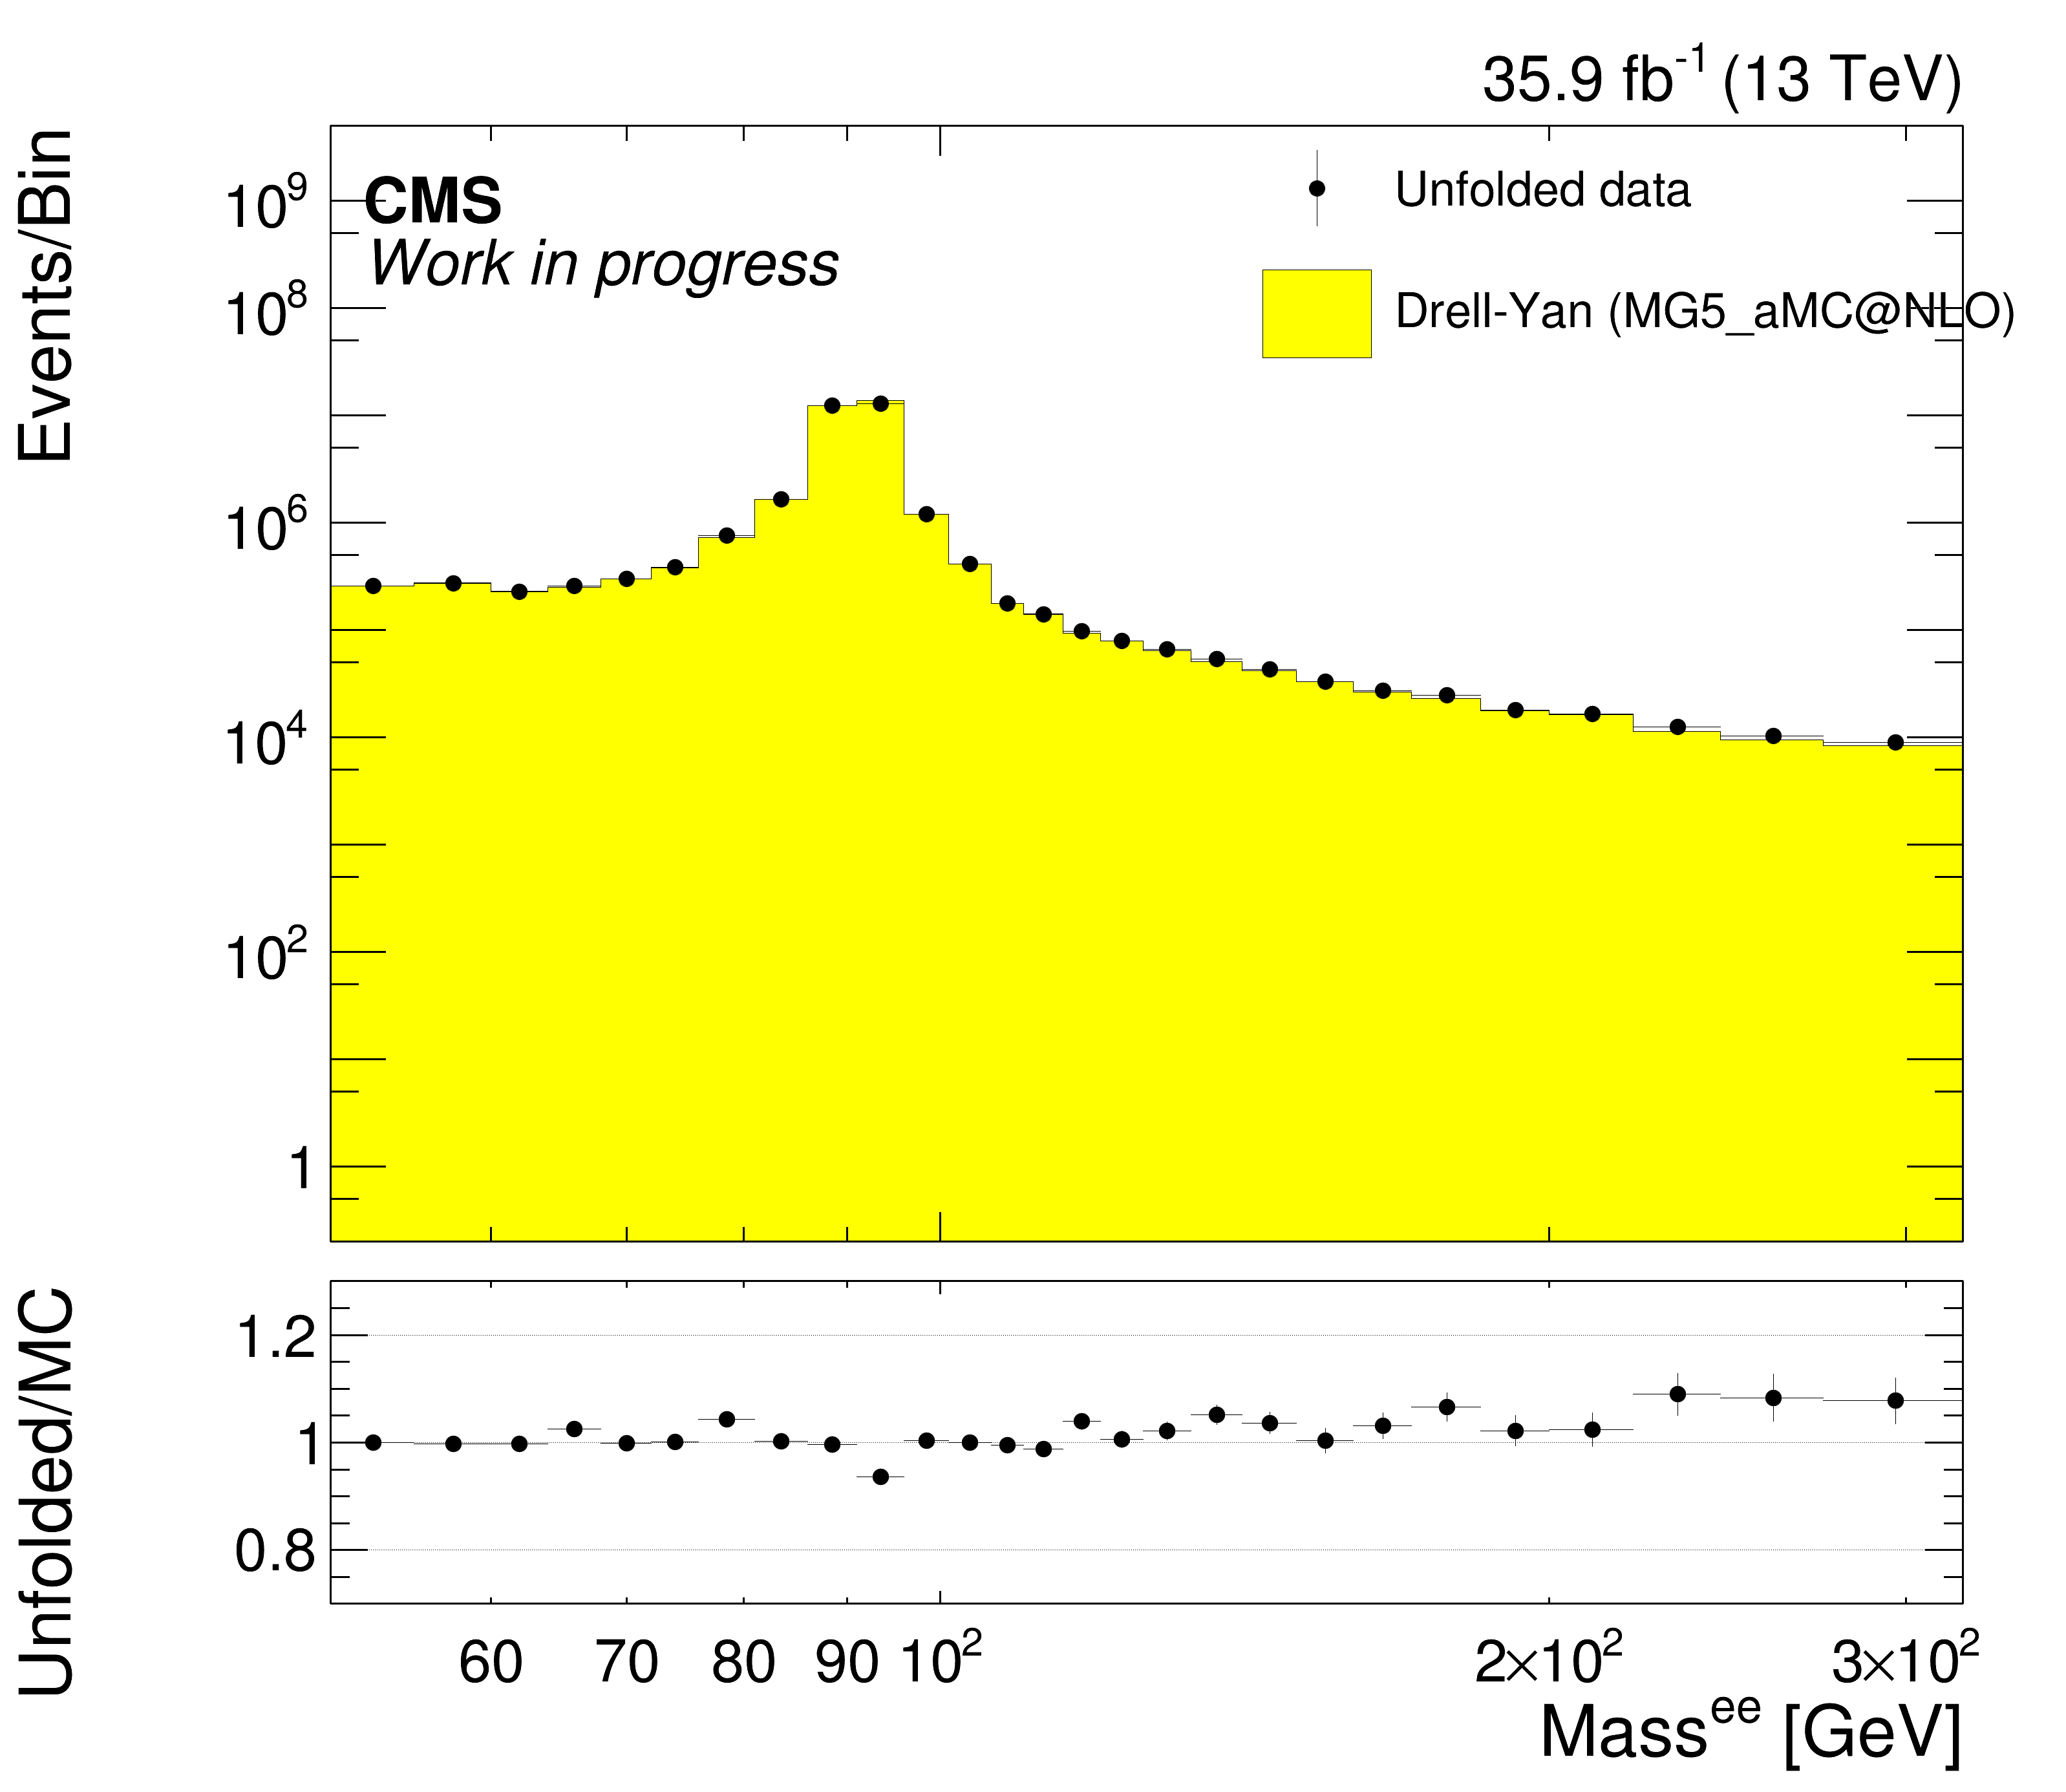

In [23]:
detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "scale", "AcceptanceCorr_Mass")

# Unfolding for QED FSR

In [24]:
binDef = "_CoarseCoarse"

phase_space = "Fiducial"
#phase_space = "FullPhase"

fsrUnfold_muon_2016 = an.ISRAnalysis(year, channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)

In [25]:
if doSys :
    fsr_systematics = {"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"],
                       #"PDF":["PDFerror{:0>3}".format(str(i)) for i in range(1,101)],
                       "Unfold":["POWHEG","Nominal"], 
                       "FSR": ["PHOTOS","PYTHIA"]}
    
    for sysName, postfixs in fsr_systematics.items():
        for postfix in postfixs:
            fsrUnfold_muon_2016.setSystematics(sysName, postfix) # Create TUnfoldDensity objects for systematics
            
            if sysName == "Unfold" or sysName == "FSR" or sysName == "PDF":
                fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, sysName, postfix)

In [26]:
fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold()) # Set nominal input using previous unfolding result
fsrUnfold_muon_2016.setFromPreviousUnfold(detUnfold_muon_2016.getISRUnfold()) # Set using previous unfolding result for systematics

In [27]:
fsrUnfold_muon_2016.drawResponseM("Pt", "", "", False)

In [28]:
fsrUnfold_muon_2016.drawResponseM("Mass","","",False)

In [29]:
#fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, "Unfold", "POWHEG")

In [30]:
fsrUnfold_muon_2016.checkMatrixCond()
fsrUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x1000de18>

In [31]:
fsrUnfold_muon_2016.doUnfold() # do nominal unfold
if doSys : 
    fsrUnfold_muon_2016.doUnfold(doSys) # do unfold for systematic

fsrUnfold_muon_2016.setMeanValues()
if doSys:
    fsrUnfold_muon_2016.setSysMeanValues()
    fsrUnfold_muon_2016.setSysError()
    fsrUnfold_muon_2016.setTotSysError()

fsrUnfold_muon_2016.doStatUnfold() # doStatUnfold() must be done after setMeanValues()
fsrUnfold_muon_2016.setStatError() # Update stat. error

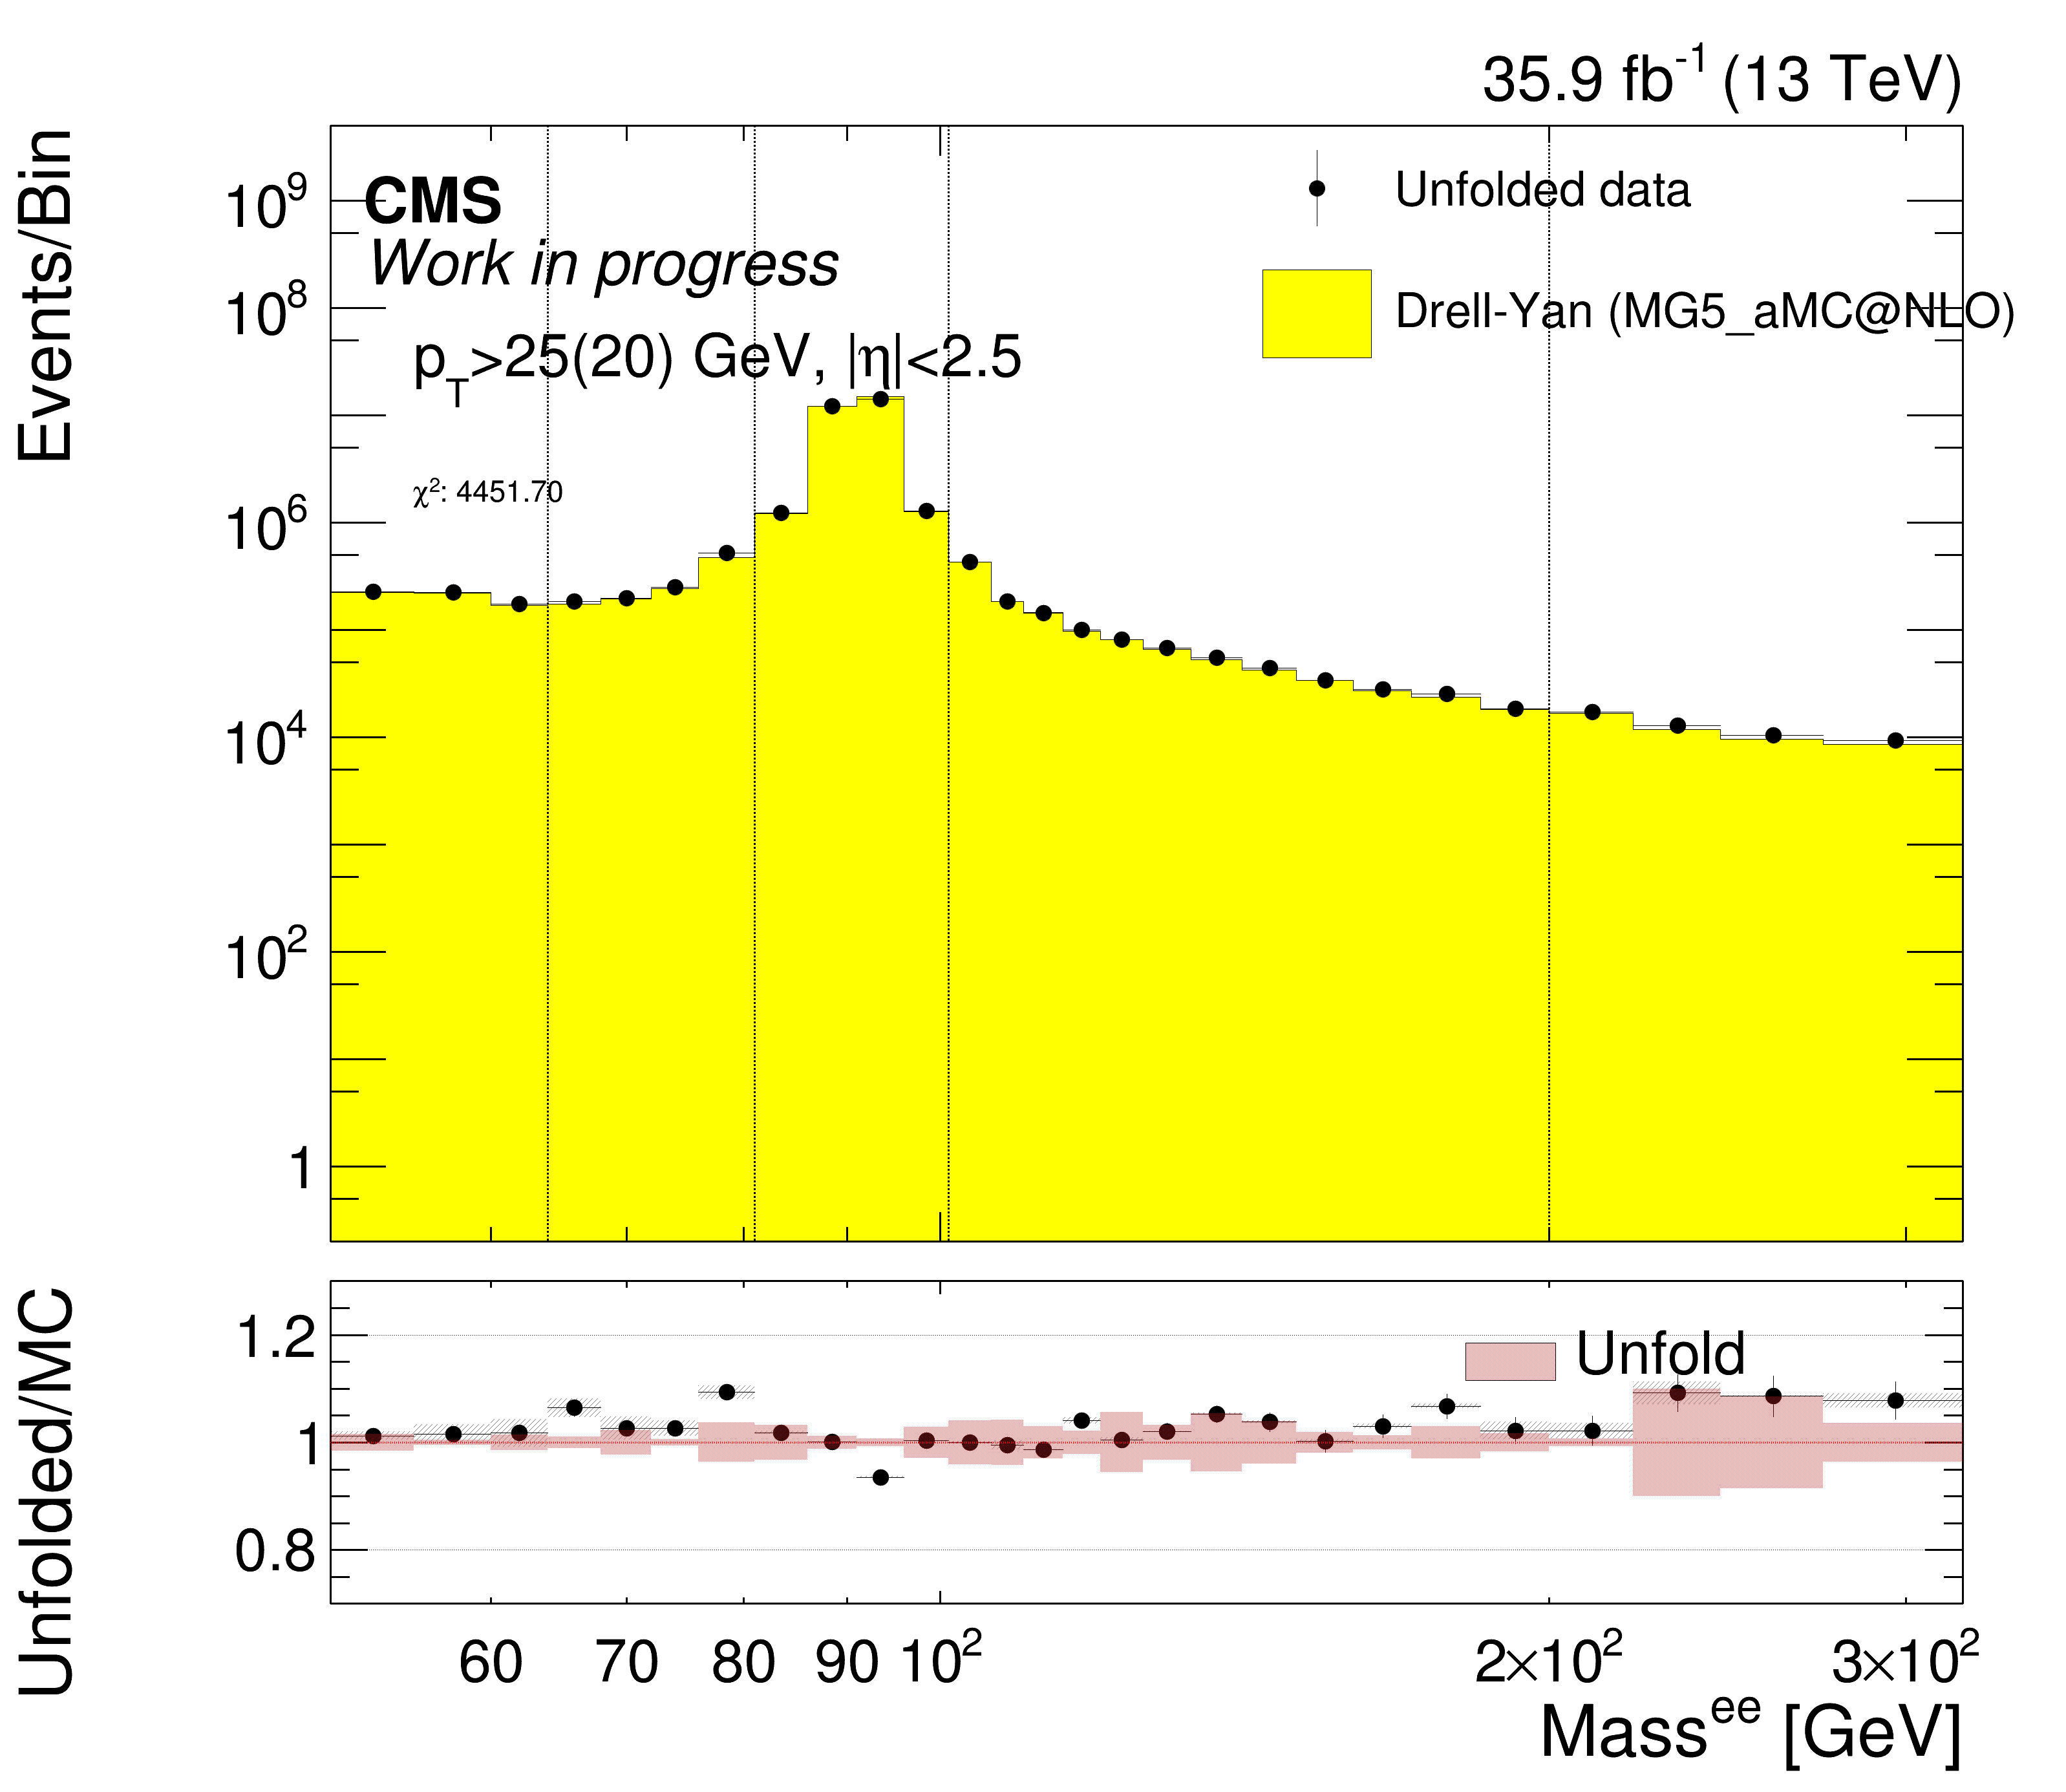

In [32]:
fsrUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "Unfold")

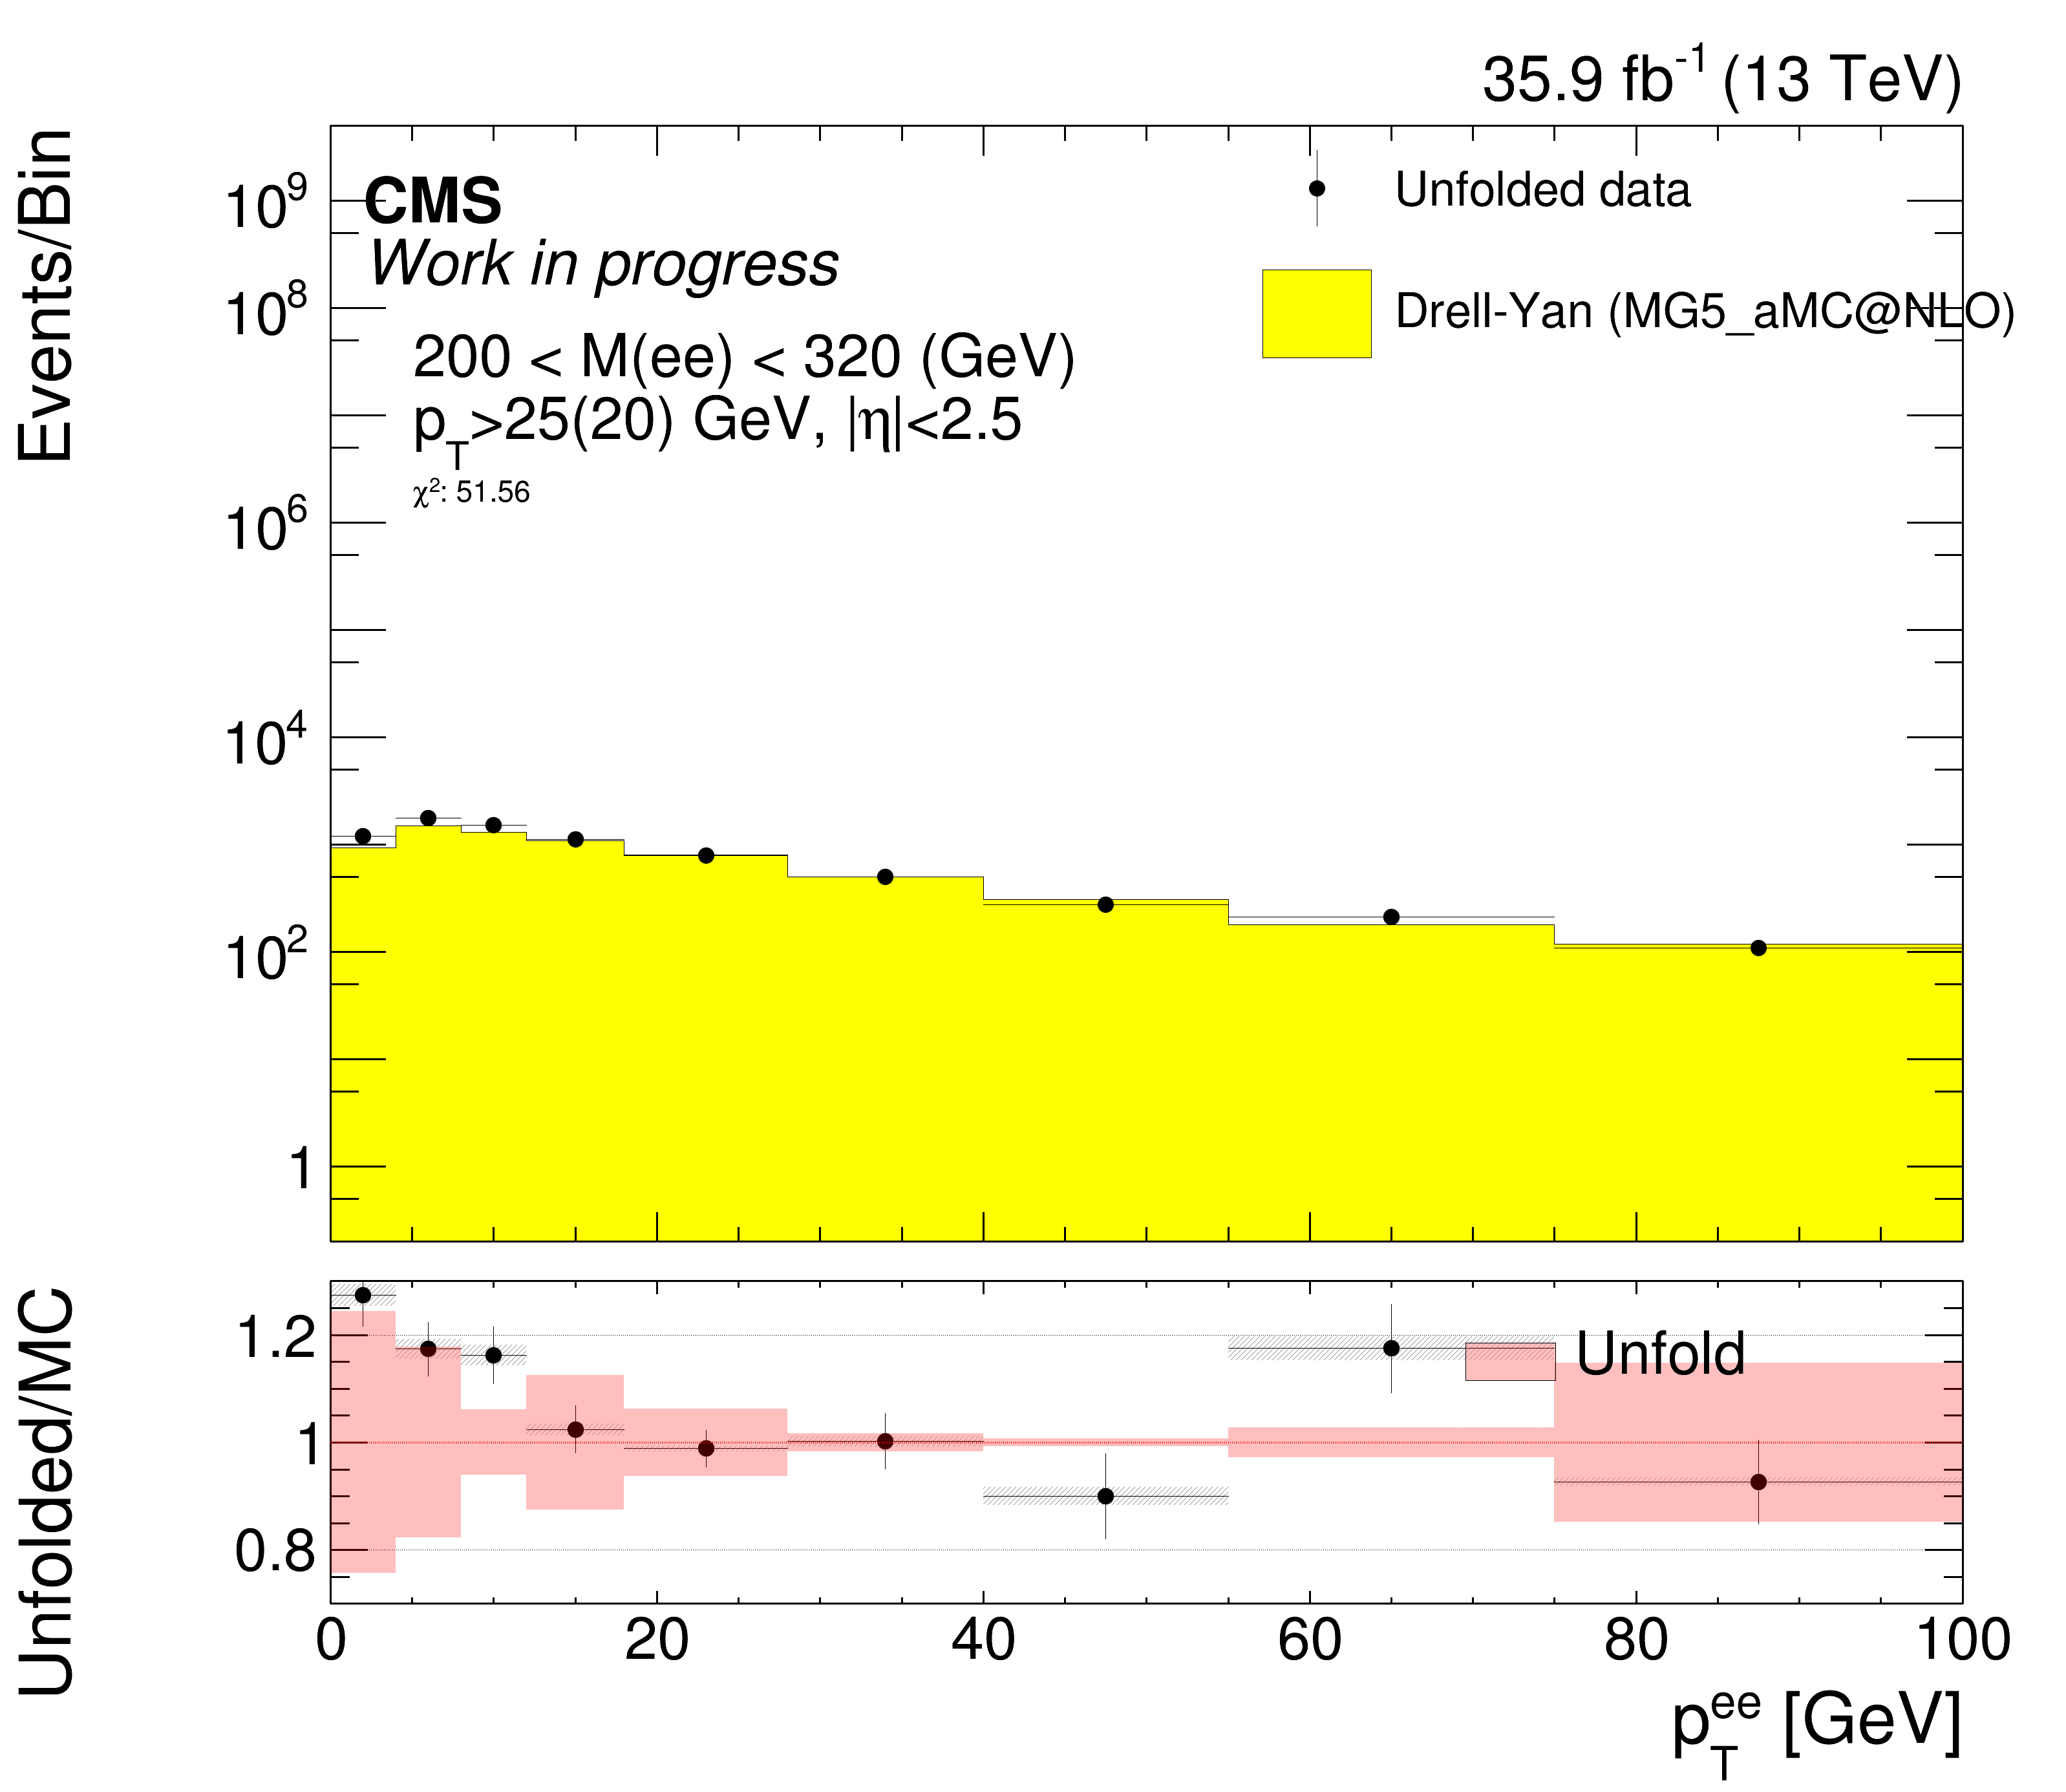

In [48]:
for massBin in range(5):
    fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "Unfold", "UnfDiPt_M"+str(massBin), massBin, True)

# Acceptance correction 

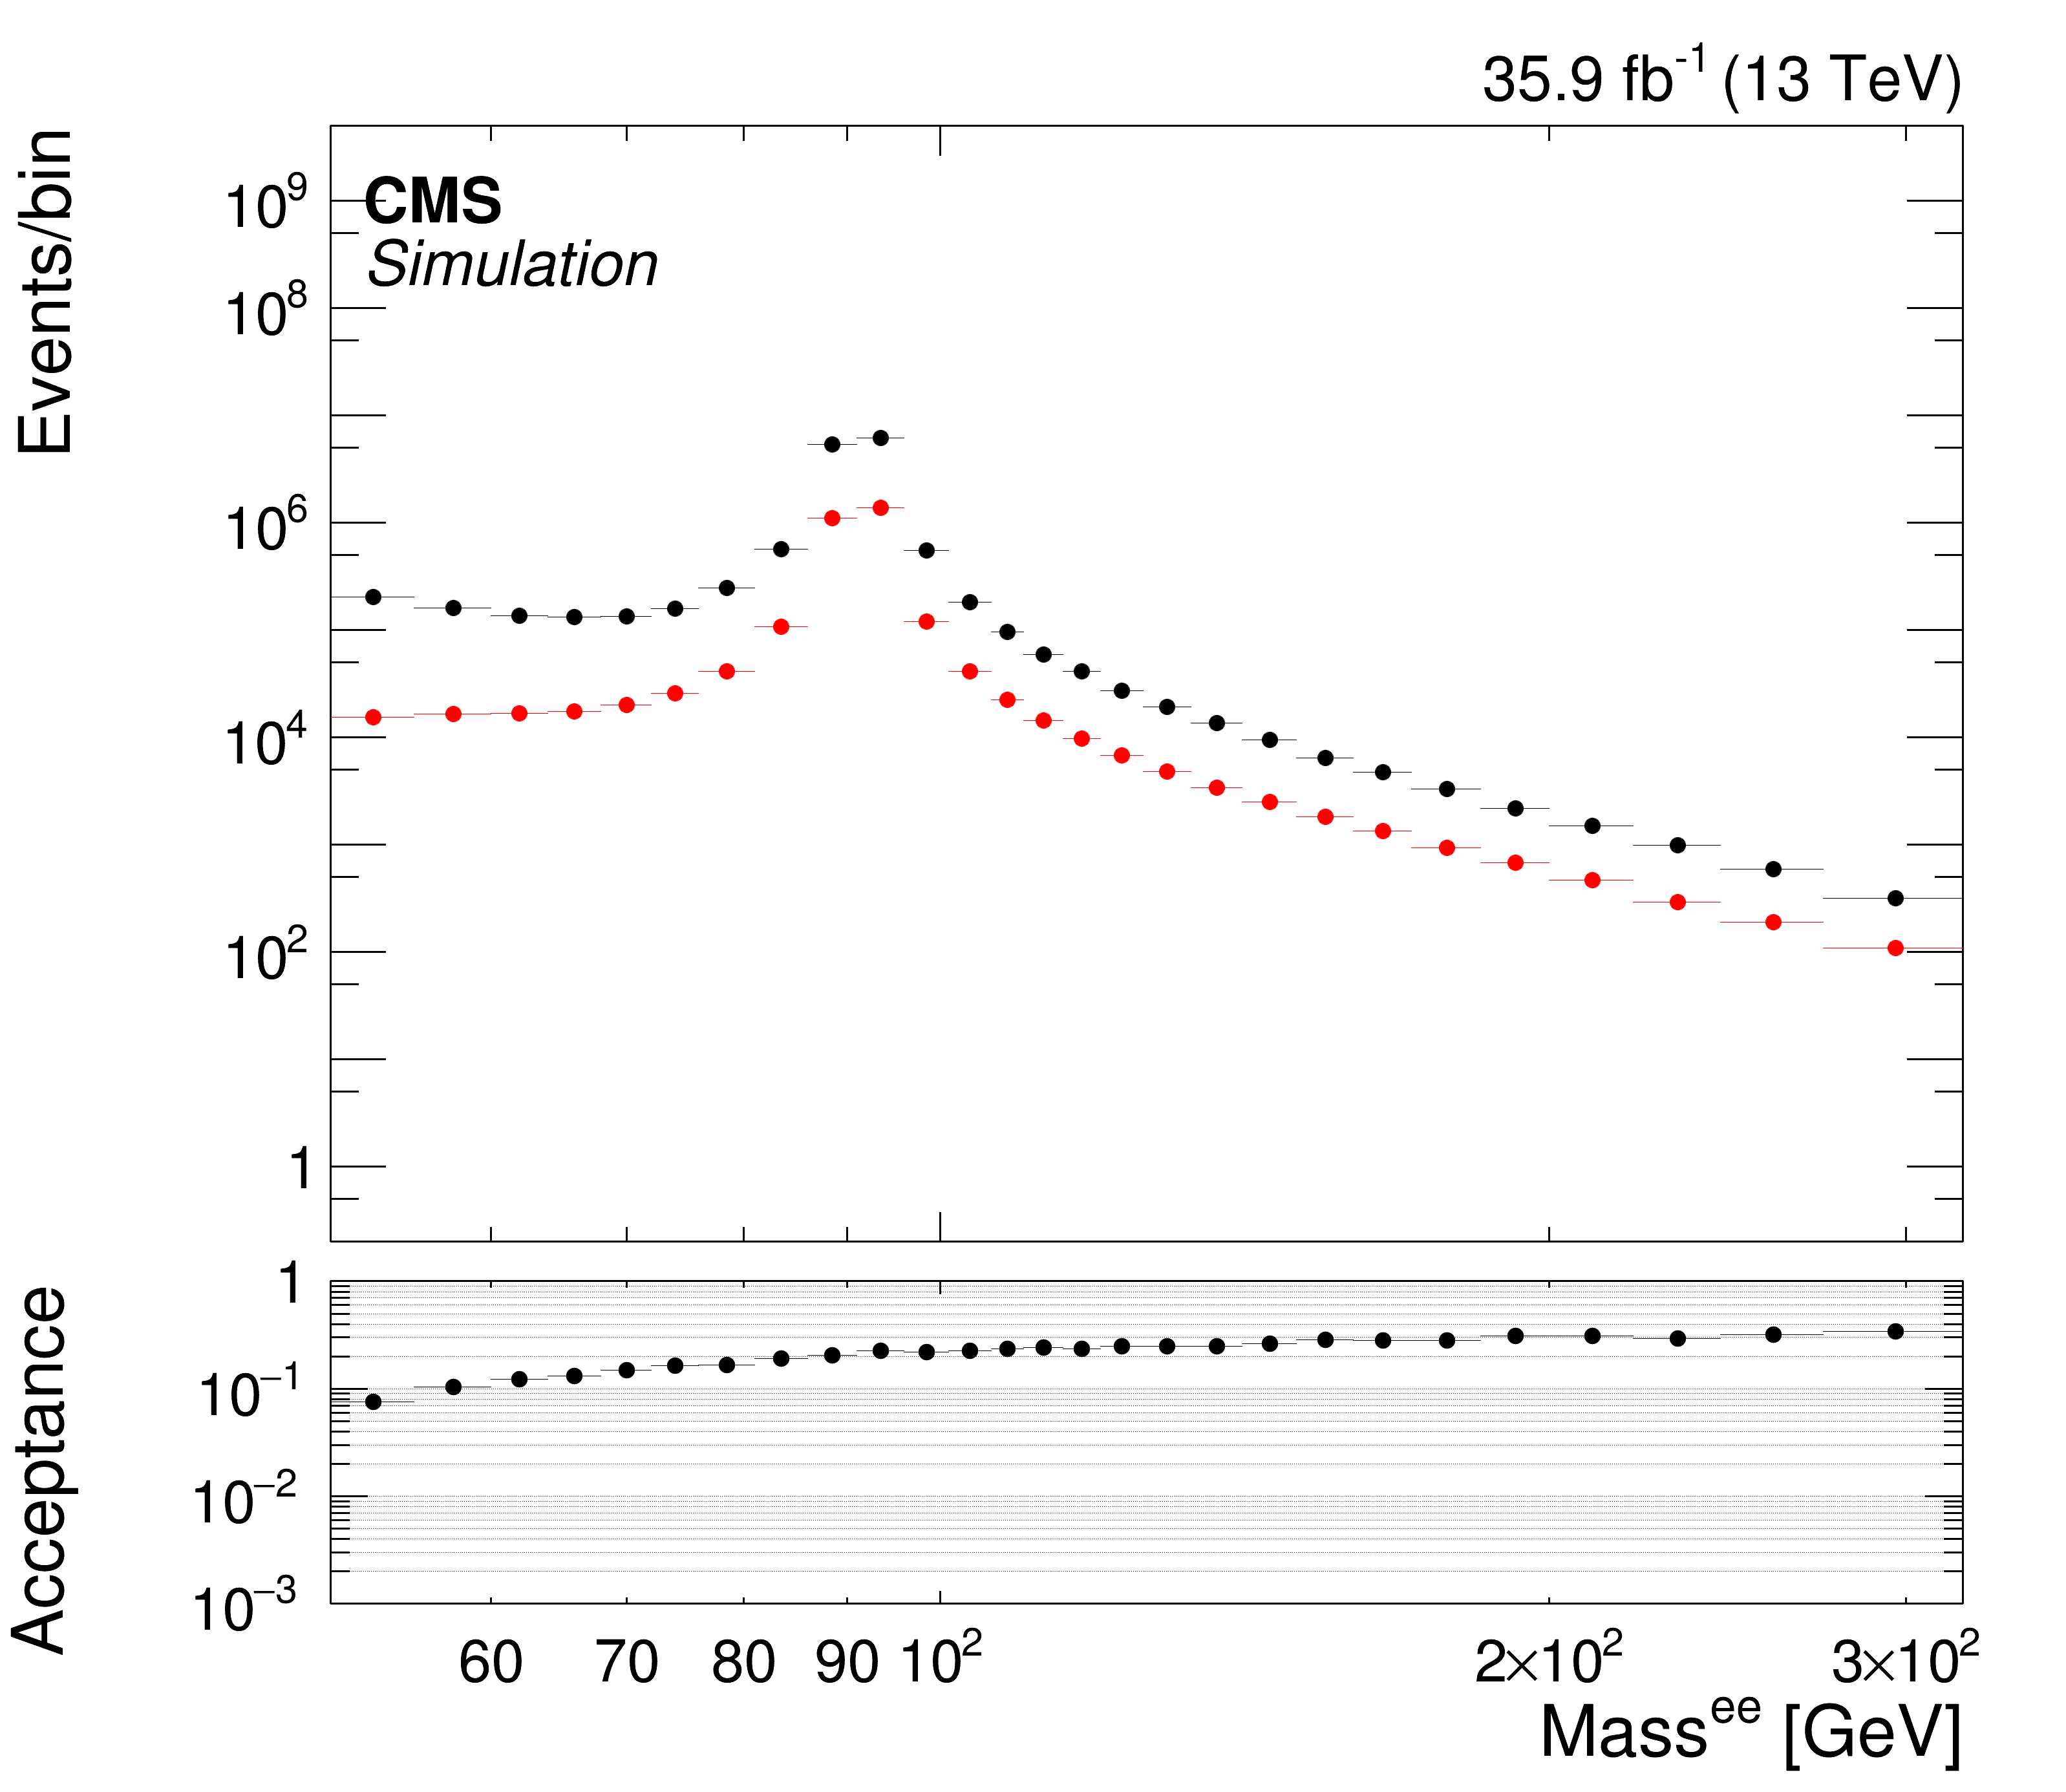

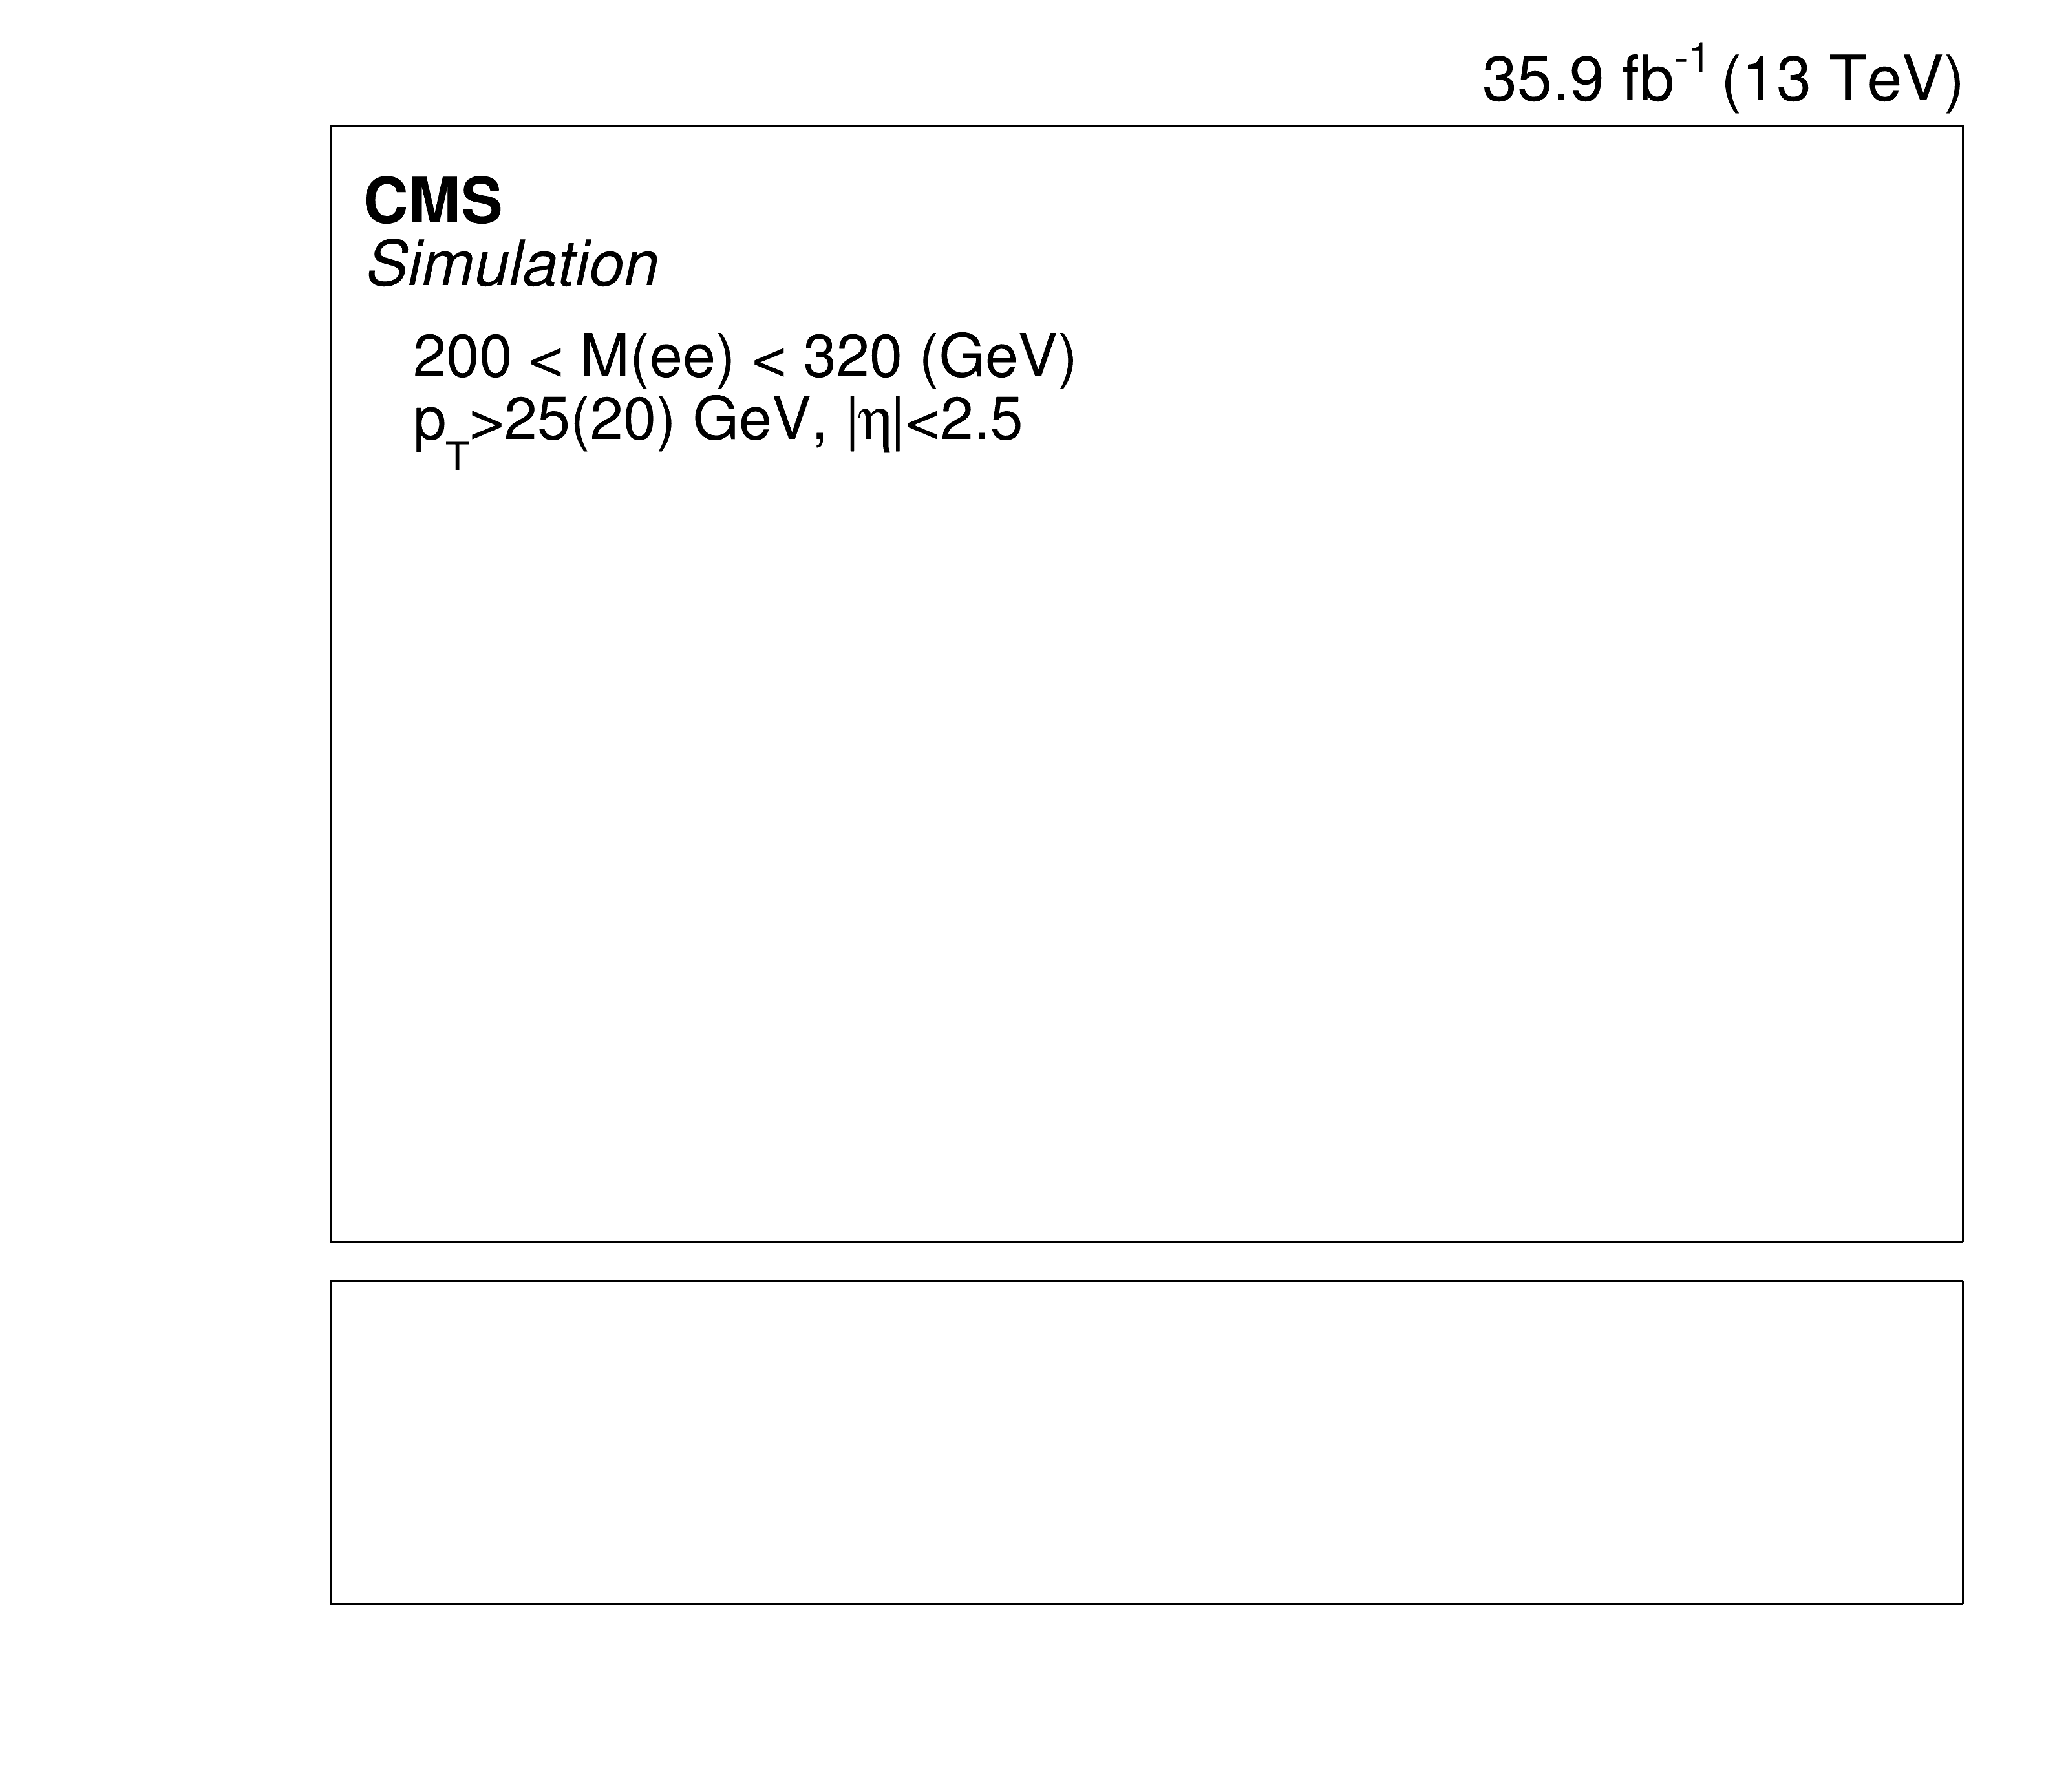

In [34]:
if phase_space == "Fiducial":
    fsrUnfold_muon_2016.doAcceptance(doSys, True)
    Unfold_muon_2016_oneStep.doAcceptance(doSys, True)

In [35]:
if phase_space == "Fiducial" :
    fsrUnfold_muon_2016.setAcceptMeanValues()
    if doSys:
        fsrUnfold_muon_2016.setAcceptSysMeanValues()
        fsrUnfold_muon_2016.setAcceptSysError()
        fsrUnfold_muon_2016.setAcceptTotSysError()
    
    Unfold_muon_2016_oneStep.setAcceptMeanValues()
    if doSys:
        Unfold_muon_2016_oneStep.setAcceptSysMeanValues()
        Unfold_muon_2016_oneStep.setAcceptSysError()
        Unfold_muon_2016_oneStep.setAcceptTotSysError()

In [36]:
if doSys: 
    fsrUnfold_muon_2016.printMeanValues()

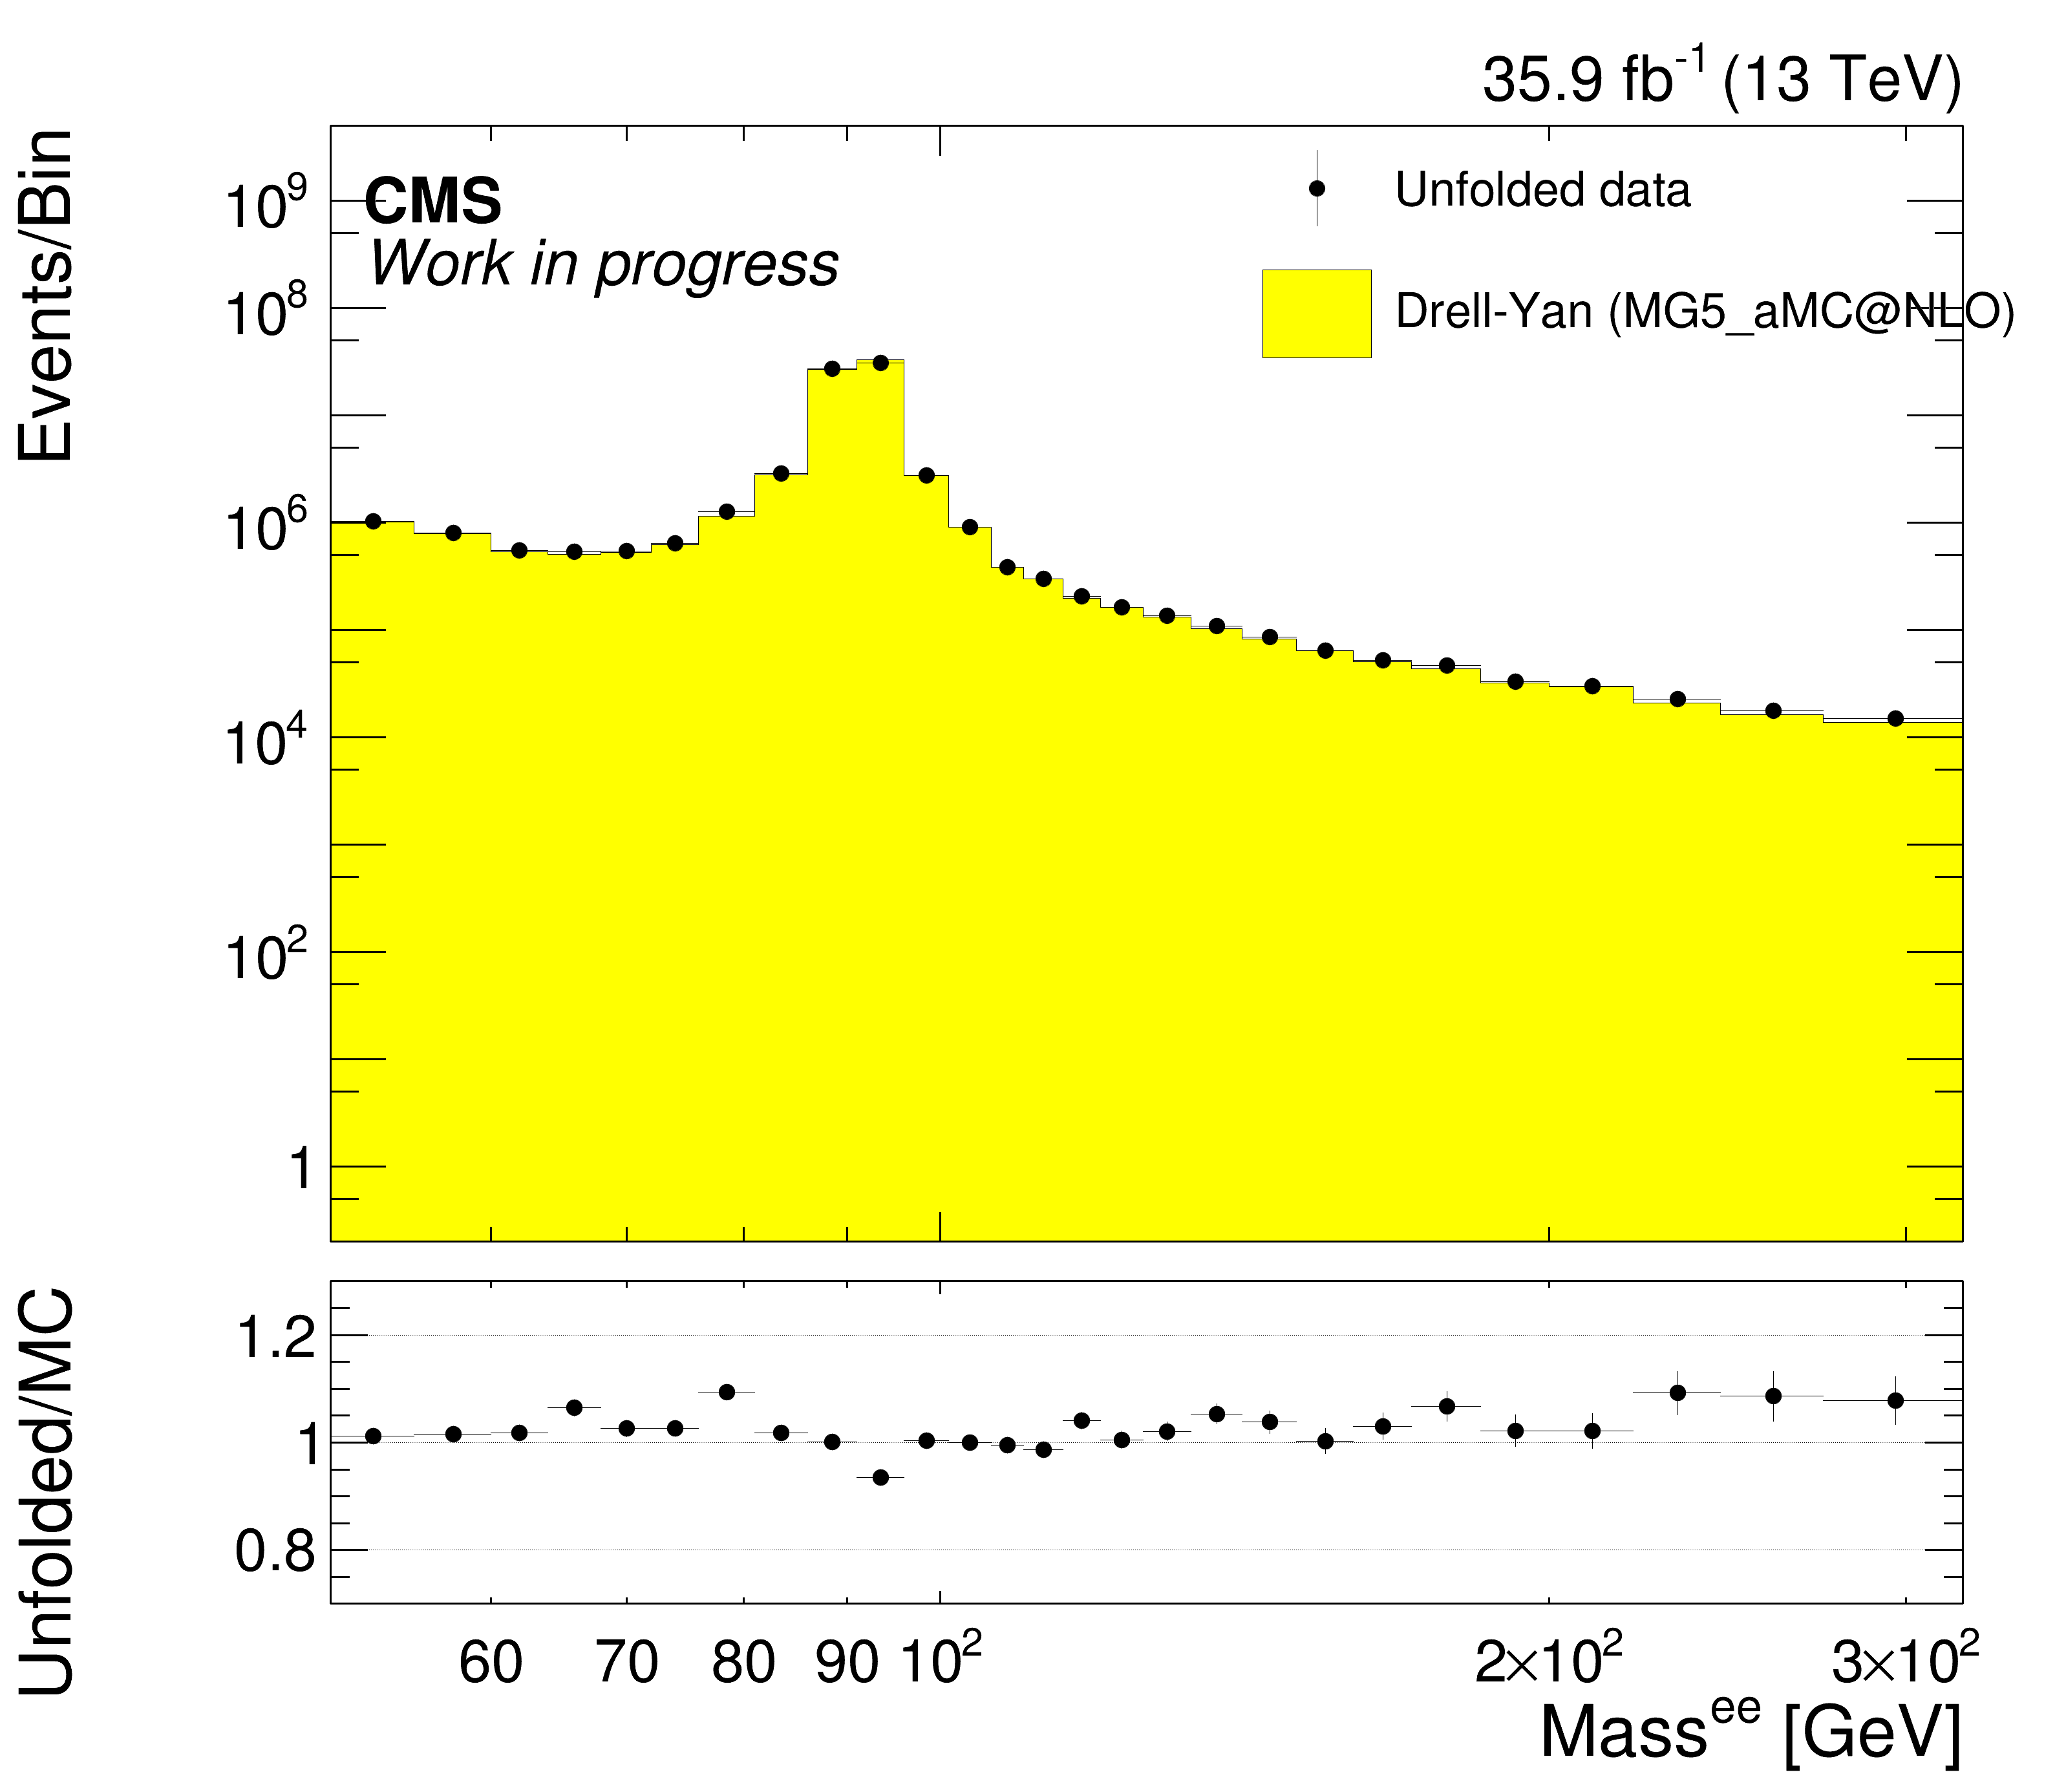

In [37]:
fsrUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "AcceptanceCorr_Mass", 0, False, True)

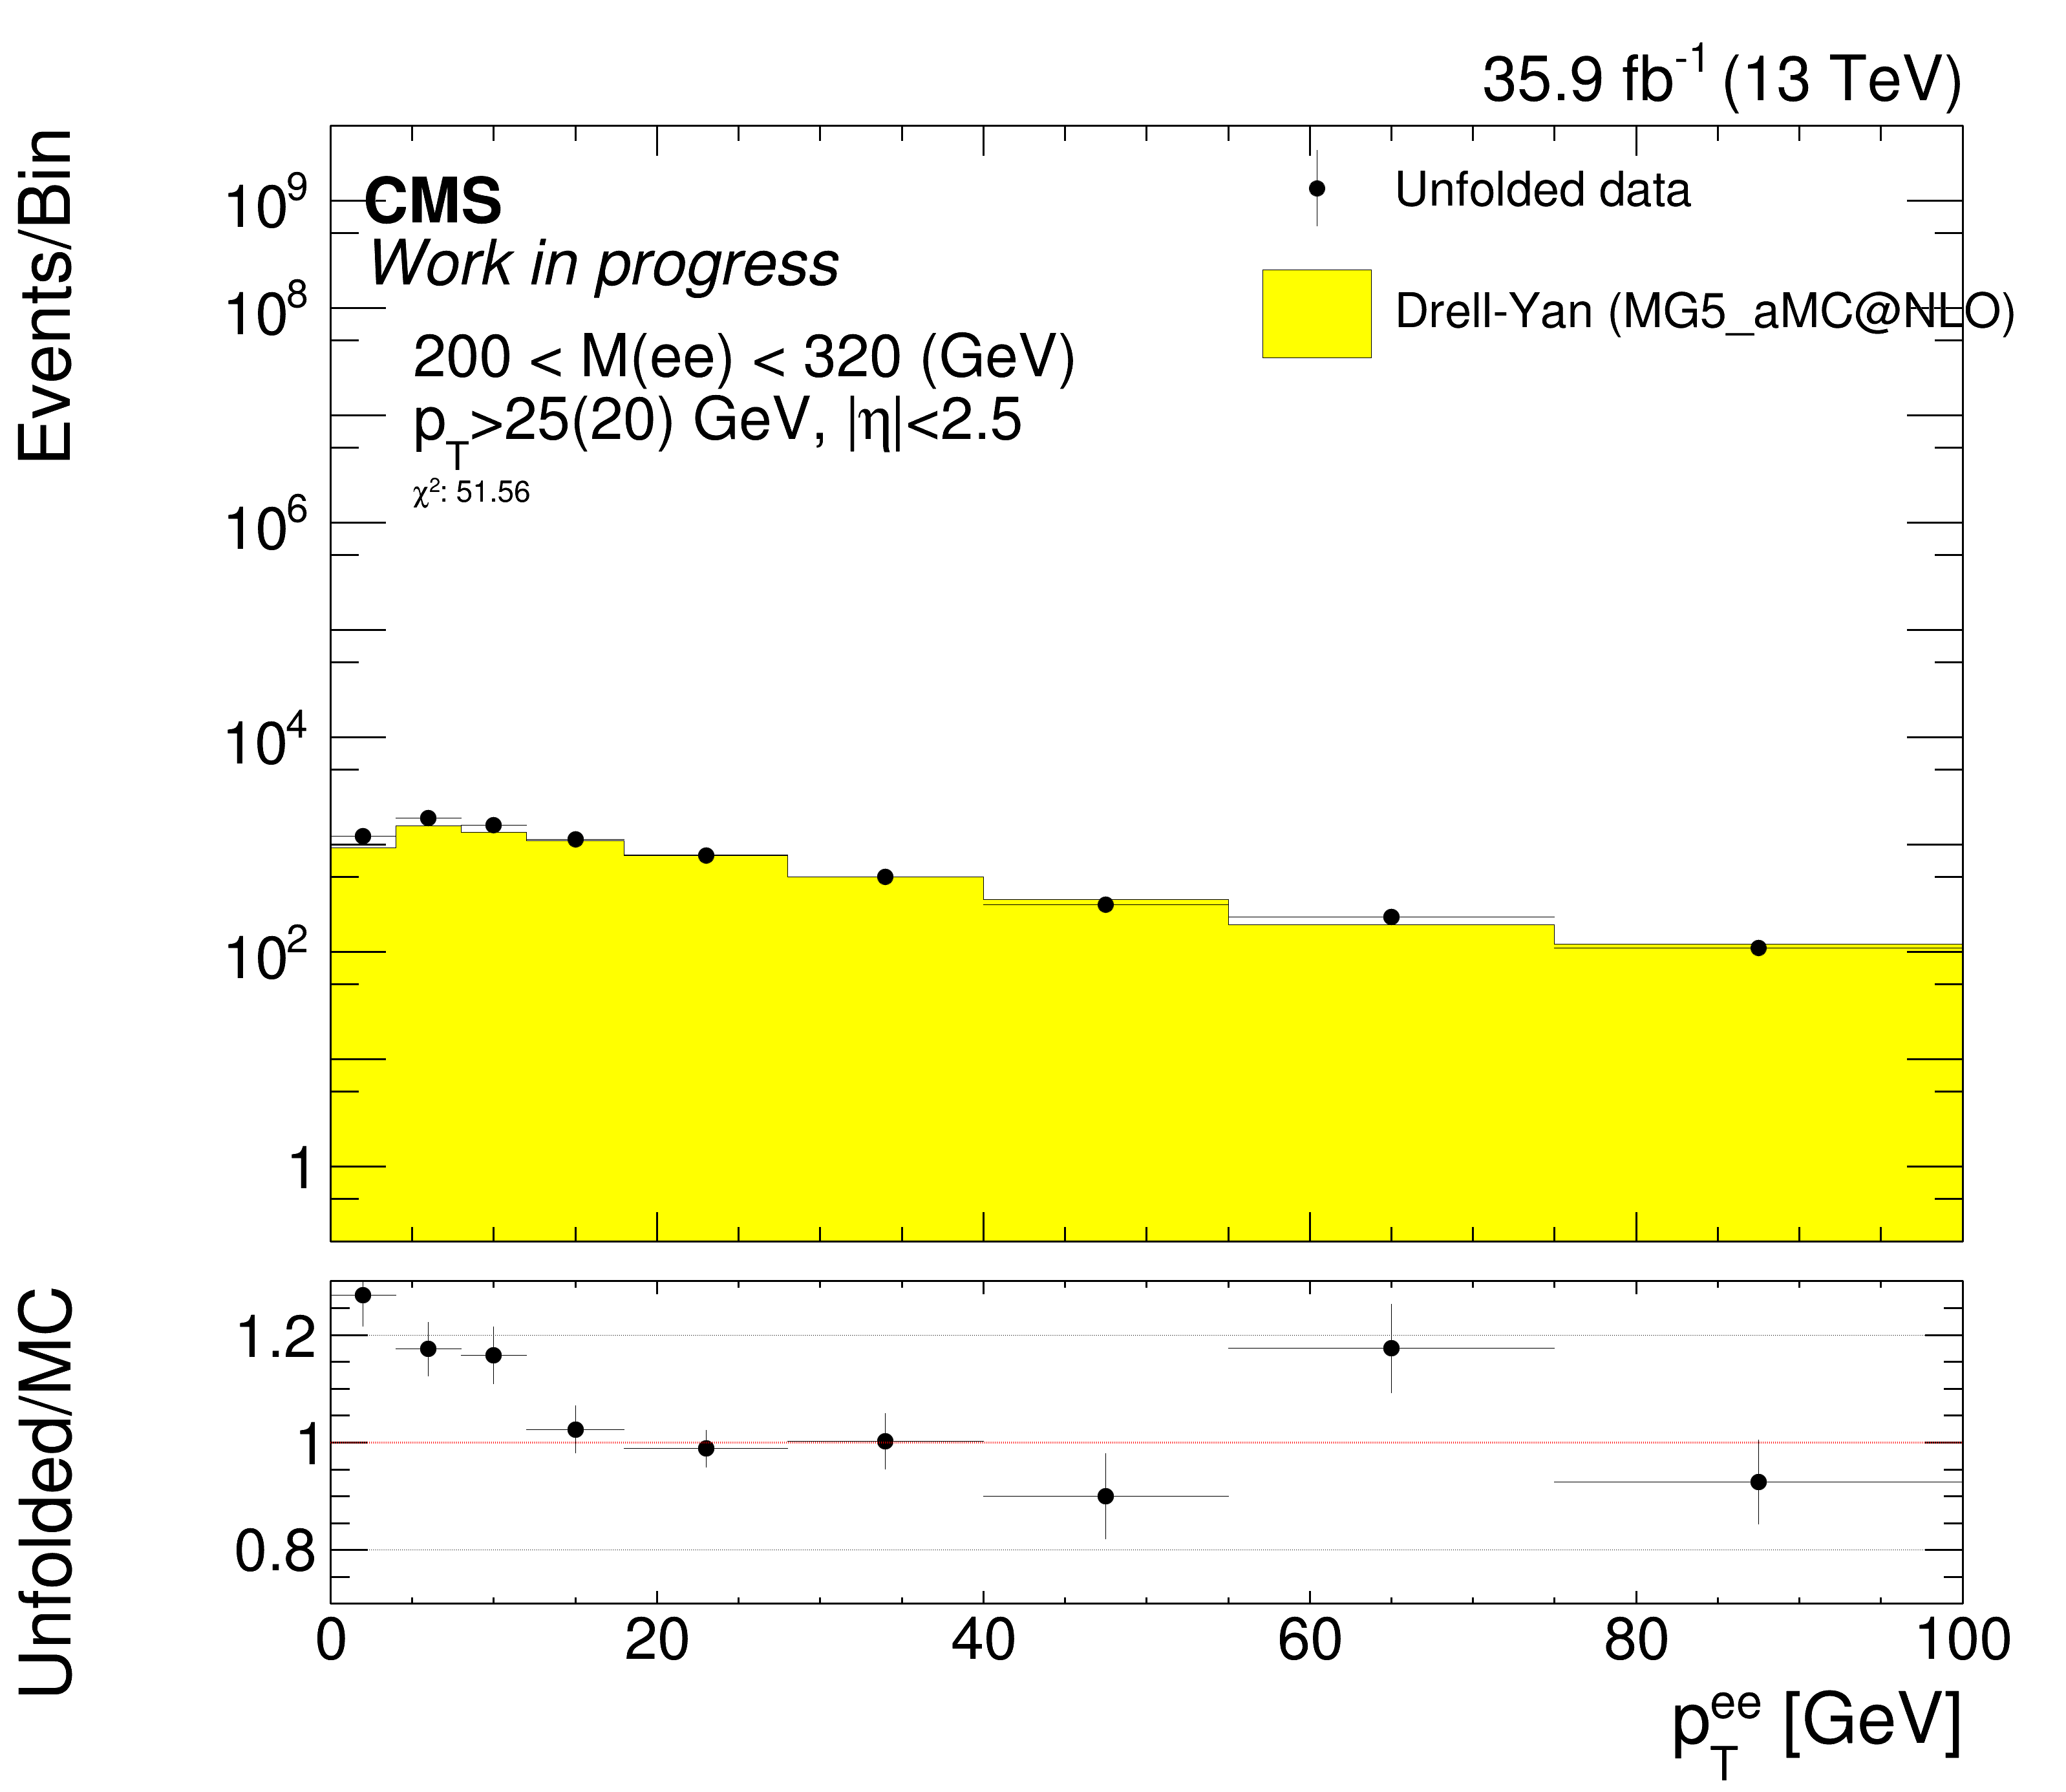

In [38]:
for massBin in range(5):
    fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "UnfDiPt_M"+str(massBin), massBin, True)

In [39]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

In [40]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")

In [41]:
gr_2016_muon_fsr =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonFSR", True,False,doSys)
gr_2016_muon_oneStep =  Unfold_muon_2016_oneStep.getPtVsMassTGraph("2016MuonDet", True,False,doSys)

In [42]:
if phase_space == "Fiducial" :
    gr_2016_muon_accept =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False,True,doSys)
    gr_2016_muon_oneStep_accept =  Unfold_muon_2016_oneStep.getPtVsMassTGraph("2016MuonDet", False,True,doSys)

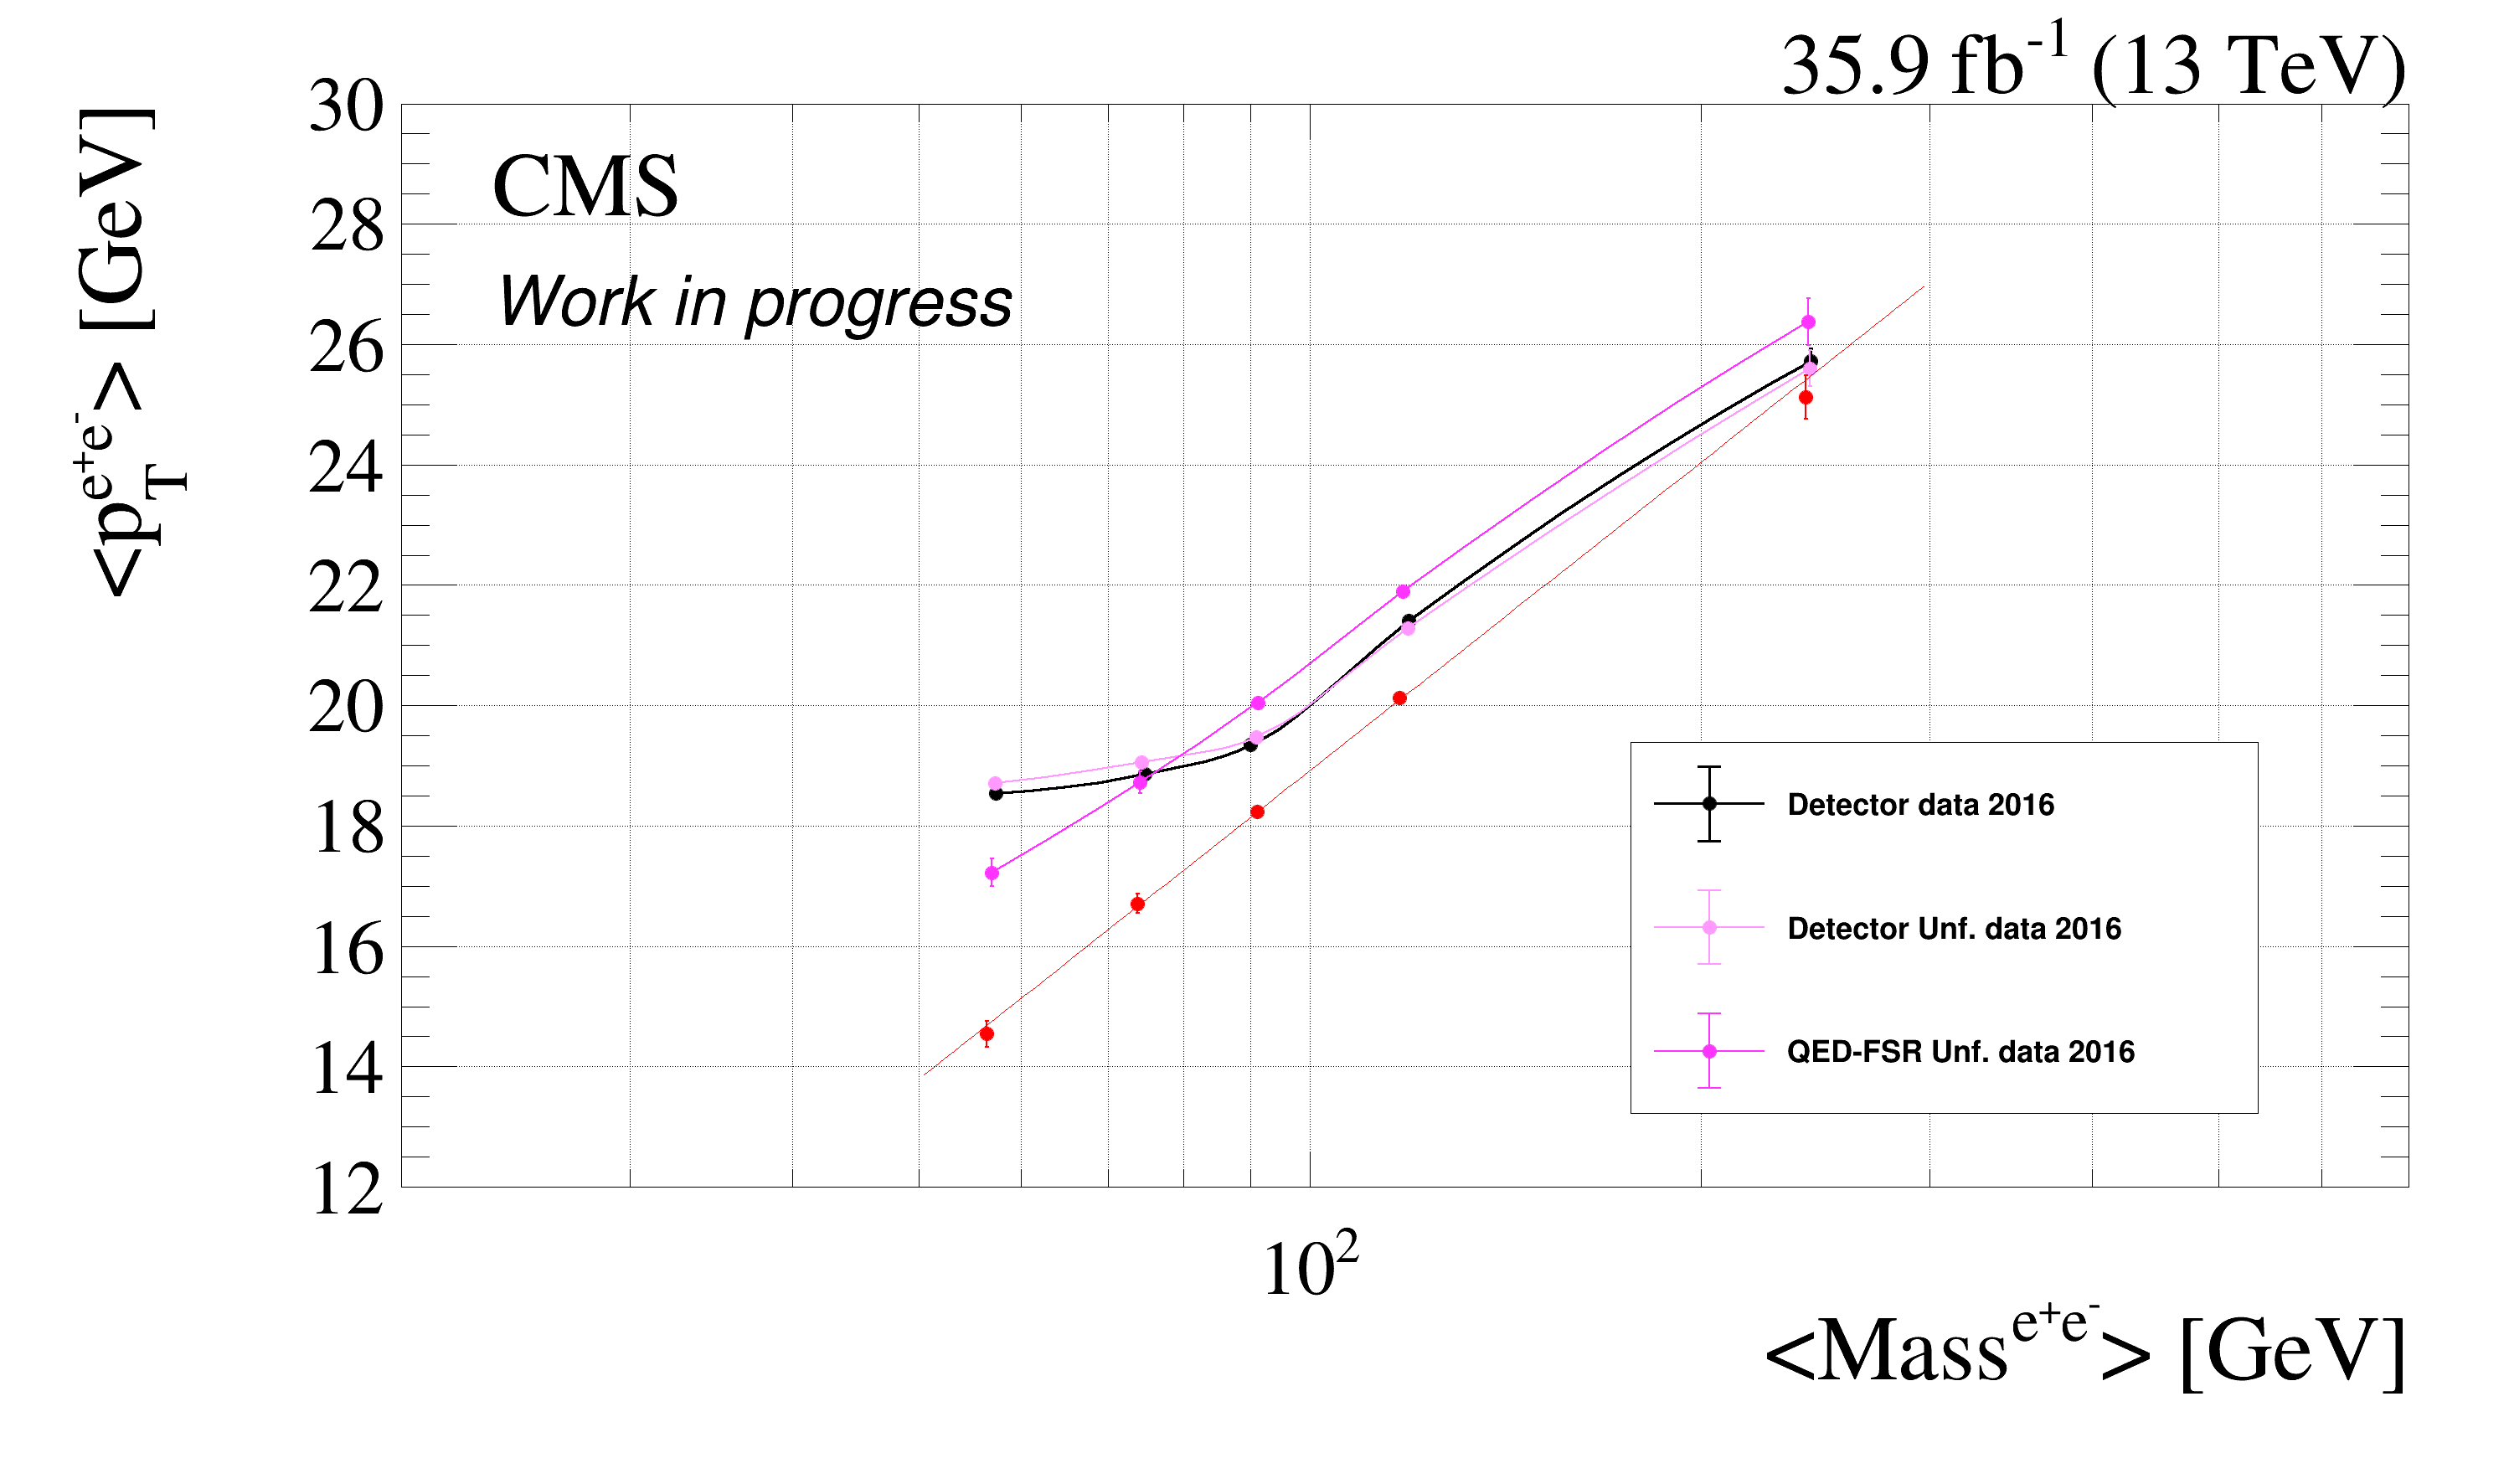

In [43]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 2.0
channel_str = "#mu^{+}#mu^{-}"
if channel == 'electron' :
    markerColor = rt.kMagenta
    channel_str = "e^{+}e^{-}"
else : markerColor = rt.kBlue

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 3000, 1800)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)
c_PtVsMass_detector.SetTopMargin(0.07)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APC")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(20., 700.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(1)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlack)
gr_2016_muon_det.SetLineColor(rt.kBlack)
gr_2016_muon_det.GetYaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetXaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetYaxis().SetTitle("<p^{"+channel_str+"}_{T}> [GeV]")
gr_2016_muon_det.GetXaxis().SetTitle("<Mass^{"+channel_str+"}> [GeV]")

gr_2016_muon_det_unfold.Draw("PC SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(markerColor-9)
gr_2016_muon_det_unfold.SetLineStyle(1)
gr_2016_muon_det_unfold.SetMarkerSize(markerSize)
gr_2016_muon_det_unfold.SetLineColor(markerColor-9)

gr_2016_muon_fsr.Draw("PC SAME")
gr_2016_muon_fsr.SetLineWidth(2)
gr_2016_muon_fsr.SetMarkerSize(markerSize)
gr_2016_muon_fsr.SetMarkerColor(markerColor-4)
gr_2016_muon_fsr.SetLineColor(markerColor-4)

#gr_2016_muon_oneStep.Draw("P SAME")
gr_2016_muon_oneStep.SetLineWidth(2)
gr_2016_muon_oneStep.SetMarkerSize(markerSize)
gr_2016_muon_oneStep.SetMarkerColor(rt.kRed)
gr_2016_muon_oneStep.SetLineColor(rt.kRed)

if phase_space == "Fiducial" :
    gr_2016_muon_accept.Draw("P SAME")
    gr_2016_muon_accept.SetLineWidth(2)
    gr_2016_muon_accept.SetMarkerSize(markerSize)
    gr_2016_muon_accept.SetMarkerColor(rt.kRed)
    gr_2016_muon_accept.SetLineColor(rt.kRed)
    
    #gr_2016_muon_oneStep_accept.Draw("P SAME")
    gr_2016_muon_oneStep_accept.SetLineWidth(2)
    gr_2016_muon_oneStep_accept.SetMarkerStyle(24)
    gr_2016_muon_oneStep_accept.SetMarkerSize(markerSize)
    gr_2016_muon_oneStep_accept.SetMarkerColor(rt.kRed)
    gr_2016_muon_oneStep_accept.SetLineColor(rt.kRed)

fitLinear1 = rt.TF1("f_1", "[0]+2.*[1]*log(x)", 40., 300.);
fitLinear1.SetLineStyle(1)
fitLinear1.SetLineColor(rt.kBlack)
fitLinear1.SetLineWidth(1)
#gr_2016_muon_fsr.Fit(fitLinear1, "R0")
#fitLinear1.Draw("same")

if phase_space == "Fiducial" :
    fitLinear2 = rt.TF1("f_2", "[0]+2.*[1]*log(x)", 50., 300.);
    fitLinear2.SetLineStyle(1)
    fitLinear2.SetLineColor(rt.kRed)
    fitLinear2.SetLineWidth(1)
    gr_2016_muon_accept.Fit(fitLinear2, "R0")
    fitLinear2.Draw("same")
    print("Chi2: ", fitLinear2.GetChisquare())

legend = rt.TLegend(0.65, 0.25, 0.9, 0.5)
legend.SetBorderSize(1);
legend.AddEntry(gr_2016_muon_det, "Detector data " + year , "ple")
legend.AddEntry(gr_2016_muon_det_unfold, "Detector Unf. data " + year, "ple")
legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. data " + year, "ple")
#legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. Accept. corrected data 2016", "ple")
legend.Draw()

CMS_lumi.extraText = "Work in progress"

iPeriod_ = 4;                                                                                                                                                                                                                                                                                                       
if year == '2017':                                                                                                                                                                                                                                                                                          
    iPeriod_ = 5                                                                                                                                                                                                                                                                                                         
if year == '2018':                                                                                                                                                                                                                                                                                                         
    iPeriod_ = 6;   

CMS_lumi.CMS_lumi(c_PtVsMass_detector, iPeriod_, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("pt_mass_" + year + ".png")

In [44]:
fsrUnfold_muon_2016.drawSystematics("Pt")
fsrUnfold_muon_2016.drawSystematics("Mass")

In [45]:
#fsrUnfold_muon_2016.drawPDFVar()
#fsrUnfold_muon_2016.drawPDFVar(False)

In [46]:
#fsrUnfold_muon_2016.drawStatVar()

In [47]:
#fsrUnfold_muon_2016.drawSysVar("Scale","Pt")
#fsrUnfold_muon_2016.drawSysVar("Scale","Mass")